<h1><center>Exploring content-wise strategies and the success factors in digital marketing on LinkedIn</center></h1>

<h2><center>Analysis Notebook</center></h2>

<h3><center>Emre Can Okten</center></h3>
<h4><center>School of Mathematics, Computer Science and Engineering</center></h4>
<h4><center>City, University of London</center></h4>
<h4><center>December, 2021</center></h4>

## 1. Importing Necessary Libraries & Packages

In [1]:
# basic operations
import pandas as pd
import numpy as np
import datetime as dt

# visualisation
import plotly_express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import altair as alt

# for text analysis
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk import FreqDist

# for sentiment analysis
from textblob import TextBlob

# statistics & machine learning
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from scipy import stats
import scipy.stats.distributions as dist

# dimension reduction
from sklearn.metrics import euclidean_distances
from sklearn.manifold import MDS

# for clustering
from sklearn.cluster import KMeans

# other libraries
import itertools
import re

In [2]:
# option for showing all the columns when head or describe methods are used
pd.set_option('display.max_columns', None)

# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib style
plt.style.use('ggplot')

# seaborn style
sns.set_style("whitegrid")

## 2. Loading the Data

### 2.1. About the Data

The data set has been acquired from:
- https://www.kaggle.com/shreyasajal/linkedin-company-pages-data

This dataset contains LinkedIn Company pages post details and other details(post dependent as well as independent) per post. This dataset can be used to analyze LinkedIn reach based on post content and related account details.

This dataset is great for Exploratory Data Analysis and NLP tasks.

The data was scraped using BeautifulSoup and Selenium.

Last updated on 15th Feb, 2021.

In [3]:
df = pd.read_csv('company_data.csv')

## 3. Initial Checks & Reviews on the Raw Data

### 3.1. Check the data types of all columns and their statistical summaries

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11654 entries, 0 to 11653
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         11654 non-null  int64  
 1   name               11654 non-null  object 
 2   headline           11624 non-null  object 
 3   location           11624 non-null  object 
 4   followers          11624 non-null  object 
 5   connections        11654 non-null  object 
 6   about              11654 non-null  object 
 7   time_spent         11654 non-null  object 
 8   content            11371 non-null  object 
 9   content_links      11654 non-null  object 
 10  media_type         11014 non-null  object 
 11  media_urls         11654 non-null  object 
 12  num_hashtags       11654 non-null  int64  
 13  hashtag_followers  11654 non-null  int64  
 14  hashtags           11654 non-null  object 
 15  reactions          11654 non-null  int64  
 16  comments           116

In [5]:
df.head(3)

Unnamed: 0               name                           headline  \
0           0  Dell Technologies  Information Technology & Services   
1           1  Dell Technologies  Information Technology & Services   
2           2  Dell Technologies  Information Technology & Services   

            location            followers connections  \
0  Round Rock, Texas  3,597,845 followers     194,140   
1  Round Rock, Texas  3,597,845 followers     194,140   
2  Round Rock, Texas  3,597,845 followers     194,140   

                                               about    time_spent  \
0  Dell Technologies is a unique family of busine...    1 week ago   
1  Dell Technologies is a unique family of busine...  20 hours ago   
2  Dell Technologies is a unique family of busine...  20 hours ago   

                                             content  \
0  #ICYMI  check out the keynote replay from the ...   
1  “We need to move faster to address the digital...   
2  Meet our 2021 APJ Sales Graduates!  Last week,...   

                                       content_links media_type  \
0  [['https://www.linkedin.com/feed/hashtag/?keyw...      video   
1  [['https://www.linkedin.com/in/ACoAAABpTIwBhTx...      image   
2  [['https://www.linkedin.com/feed/hashtag/?keyw...      image   

                                          media_urls  num_hashtags  \
0  ['blob:https://www.linkedin.com/4680e2eb-c683-...             2   
1  ['https://media-exp1.licdn.com/dms/image/C4D22...             1   
2  ['https://media-exp1.licdn.com/dms/image/C4D22...             2   

   hashtag_followers                                           hashtags  \
0                  0  [['https://www.linkedin.com/feed/hashtag/?keyw...   
1                  0  [['https://www.linkedin.com/feed/hashtag/?keyw...   
2                  0  [['https://www.linkedin.com/feed/hashtag/?keyw...   

   reactions  comments  views votes  
0       1217       577    NaN   NaN  
1         76         2    NaN   NaN  
2         35         0    NaN   NaN

In [6]:
df.describe(include = 'all')

Unnamed: 0               name                           headline  \
count   11654.000000              11654                              11624   
unique           NaN                 47                                 23   
top              NaN  Dell Technologies  Information Technology & Services   
freq             NaN                499                               1665   
mean     5826.500000                NaN                                NaN   
std      3364.364353                NaN                                NaN   
min         0.000000                NaN                                NaN   
25%      2913.250000                NaN                                NaN   
50%      5826.500000                NaN                                NaN   
75%      8739.750000                NaN                                NaN   
max     11653.000000                NaN                                NaN   

                  location            followers connections  \
count                11624                11624       11654   
unique                  39                   46          47   
top     New York, New York  3,597,845 followers     194,140   
freq                  1182                  499         499   
mean                   NaN                  NaN         NaN   
std                    NaN                  NaN         NaN   
min                    NaN                  NaN         NaN   
25%                    NaN                  NaN         NaN   
50%                    NaN                  NaN         NaN   
75%                    NaN                  NaN         NaN   
max                    NaN                  NaN         NaN   

                                                    about    time_spent  \
count                                               11654         11654   
unique                                                 47            51   
top     Dell Technologies is a unique family of busine...  2 months ago   
freq                                                  499          1248   
mean                                                  NaN           NaN   
std                                                   NaN           NaN   
min                                                   NaN           NaN   
25%                                                   NaN           NaN   
50%                                                   NaN           NaN   
75%                                                   NaN           NaN   
max                                                   NaN           NaN   

                                         content content_links media_type  \
count                                      11371         11654      11014   
unique                                     11325         10533          7   
top     #PoweringThruTogether   #ExelonCommunity            []      image   
freq                                           4          1027       3821   
mean                                         NaN           NaN        NaN   
std                                          NaN           NaN        NaN   
min                                          NaN           NaN        NaN   
25%                                          NaN           NaN        NaN   
50%                                          NaN           NaN        NaN   
75%                                          NaN           NaN        NaN   
max                                          NaN           NaN        NaN   

       media_urls  num_hashtags  hashtag_followers hashtags     reactions  \
count       11654  11654.000000            11654.0    11654  11654.000000   
unique      10417           NaN                NaN     7648           NaN   
top            []           NaN                NaN       []           NaN   
freq         1087           NaN                NaN     4007           NaN   
mean          NaN      1.593187                0.0      NaN    514.110348   
std           NaN      1.825

### 3.2. Check the value counts in important categorical variable columns

In [7]:
df.name.value_counts(dropna = False)

Dell Technologies                     499
SAP                                   470
Hewlett Packard Enterprise            464
VMware                                460
Cognizant                             455
Pfizer                                450
Salesforce                            450
AT&T                                  449
Colgate-Palmolive                     445
Siemens                               435
Huawei                                430
Unilever                              428
BMW Group                             408
Cigna                                 393
HSBC                                  349
Biogen                                348
Merck Group                           332
ViacomCBS                             287
Kroger                                281
ITC Limited                           276
Fiserv                                247
Caterpillar Inc.                      246
MetLife                               228
Exelon                            

In [8]:
df.headline.value_counts(dropna = False)

Information Technology & Services        1665
Consumer Goods                           1149
Automotive                               1046
Computer Software                         930
Telecommunications                        879
Pharmaceuticals                           782
Financial Services                        705
Internet                                  674
Retail                                    559
Industrial Automation                     435
Machinery                                 406
Health, Wellness & Fitness                393
Biotechnology                             348
Insurance                                 291
Entertainment                             287
Utilities                                 203
Restaurants                               165
Aviation & Aerospace                      155
Building Materials                        155
Computer Games                            149
Oil & Energy                              138
Electrical & Electronic Manufactur

In [9]:
df.location.value_counts(dropna = False)

New York, New York                   1182
Munich                               1016
San Francisco, CA                     680
Round Rock, Texas                     499
Walldorf, BW                          470
San Jose, California                  464
Palo Alto, CA                         460
Teaneck, New Jersey                   455
Dallas, TX                            449
Shenzhen, Guangdong                   430
Blackfriars, London                   428
Bloomfield, CT                        393
Chicago, IL                           358
London                                349
Cambridge, MA                         348
Darmstadt                             332
Cincinnati, Ohio                      281
Kolkata, West Bengal                  276
Brookfield, Wisconsin                 247
Deerfield, IL                         246
New York, NY                          228
Torrance, CA                          194
San Jose, CA                          177
Chicago, Illinois                 

In [10]:
df.media_type.value_counts(dropna = False)

image       3821
article     3541
video       3327
NaN          640
document     273
poll          47
entity         3
view           2
Name: media_type, dtype: int64

## 4. Data Wrangling

### 4.1. Copy the Original Data Frame

#### To keep the original data frame for later reference, we will create a copy to work on and perform all necessary operations

In [11]:
# copy the original data frame
df_c = df.copy()

### 4.2. Rows Containing Missing Values

#### Investigate rows having missing data in headline, location and followers columns

All columns look properly populated except for **views** and **votes** columns, which we will drop in **4.3. Column Modifications** section. For now, let's focus on rows with missing data.

There are 30 rows that has missing data in headline, location and followers values. We suspect these might be coming from the same company name since the number of missing values in all 3 column is the same. 

Let's check which company names are responsible for these.

In [12]:
# check which company names have NaN in their headline column
df_c[df_c['headline'].isnull()].name.unique()

array(['Foxconn'], dtype=object)

In [13]:
# check which company names have NaN in their location column
df_c[df_c['location'].isnull()].name.unique()

array(['Foxconn'], dtype=object)

In [14]:
# check which company names have NaN in their location column
df_c[df_c['followers'].isnull()].name.unique()

array(['Foxconn'], dtype=object)

In [15]:
# check the percentage of non-null rows in headline column
df_c[['headline']].notnull().mean()

headline    0.997426
dtype: float64

In [16]:
# check the number of non-null rows in headline column
df_c[['headline']].isnull().sum()

headline    30
dtype: int64

It looks like the rows having Foxconn in their name column have missing values. We could have manually filled these rows in headline and location columns, but it would be very hard to find the the exact followers of Foxconn on the data scrape date. 

Since we are going to use followers variable while we are deriving success measures, this can affect badly our data and eventually our model. 30 rows is not too many compared to the total of 11654 rows, so we can drop these rows from our dataset.

In [17]:
# drop the rows that has NaN in headline column
df_c.dropna(subset=['headline'], inplace = True)

# reset the index
df_c.reset_index(drop=True, inplace=True) 

#### Investigate rows having missing data in content column

In [18]:
# check which company names have NaN in their headline column
df_c[df_c['content'].isnull()].name.unique()

array(['Dell Technologies', 'AT&T', 'Allianz',
       'American Honda Motor Company, Inc.', 'Huawei', 'Philips',
       "McDonald's", 'BMW Group', 'Siemens', 'SAP', 'HSBC', 'MetLife',
       'Merck Group', 'Cognizant', 'Hewlett Packard Enterprise', 'VMware',
       'Boeing', 'eBay', 'Uber', 'Electronic Arts (EA)', 'Pfizer',
       'Chevron', 'Cigna', 'Exelon', 'Biogen', 'Fiserv', 'ViacomCBS',
       'Ford Motor Company', 'Salesforce', 'Carrier', 'Colgate-Palmolive',
       'PACCAR', 'Kroger', 'Charles Schwab', 'John Deere'], dtype=object)

In [19]:
# check the percentage of non-null rows in headline column
df_c[['content']].notnull().mean()

content    0.976514
dtype: float64

In [20]:
# check the number of non-null rows in headline column
df_c[['content']].isnull().sum()

content    273
dtype: int64

In [21]:
df_c[df_c['content'].isnull()].head(3)

Unnamed: 0               name                           headline  \
57           57  Dell Technologies  Information Technology & Services   
64           64  Dell Technologies  Information Technology & Services   
167         167  Dell Technologies  Information Technology & Services   

              location            followers connections  \
57   Round Rock, Texas  3,597,845 followers     194,140   
64   Round Rock, Texas  3,597,845 followers     194,140   
167  Round Rock, Texas  3,597,845 followers     194,140   

                                                 about    time_spent content  \
57   Dell Technologies is a unique family of busine...   3 weeks ago     NaN   
64   Dell Technologies is a unique family of busine...  5 months ago     NaN   
167  Dell Technologies is a unique family of busine...  5 months ago     NaN   

    content_links media_type media_urls  num_hashtags  hashtag_followers  \
57             []        NaN         []             0                  0   
64             []       poll         []             0                  0   
167            []        NaN         []             0                  0   

    hashtags  reactions  comments  views votes  
57        []        235         3    NaN   NaN  
64        []         49         1    NaN    98  
167       []         29         0    NaN   NaN

We do not know if this missing data is because there is no content in the post or is because of an error in the scraping process. 

There are various companies have missing data in their content column, and the percentage of missing data is less than 2.5% of all rows. Also, rows having missing data in their content column also have missing data on other column. This strengthens the assumption that the missing data in this row is because of a scraping error.

So it makes more sense to drop these rows to be on the safe side.

In [22]:
# drop the rows that has NaN in headline column
df_c.dropna(subset=['content'], inplace = True)

# reset the index
df_c.reset_index(drop=True, inplace=True) 

#### Investigate rows having missing data in media_type column

In [23]:
# check which company names have NaN in their headline column
df_c[df_c['media_type'].isnull()].name.unique()

array(['Dell Technologies', 'AT&T', 'Allianz',
       'American Honda Motor Company, Inc.', 'Huawei', 'Philips',
       'Volkswagen AG', "McDonald's", 'Hyundai Motor Company',
       'BMW Group', 'Mercedes-Benz USA', 'Siemens', 'SAP', 'HSBC',
       'Tesco', 'MetLife', 'Merck Group', 'Cognizant',
       'Hewlett Packard Enterprise', 'VMware', 'Boeing', 'eBay', 'Uber',
       'Electronic Arts (EA)', 'Caterpillar Inc.', 'Pfizer', 'Chevron',
       'Cigna', 'Exelon', 'Biogen', 'Fiserv', 'ViacomCBS',
       'Ford Motor Company', 'Salesforce', 'Carrier', 'Colgate-Palmolive',
       'ITC Limited', 'Unilever', 'PACCAR', 'Kroger', 'Charles Schwab',
       'John Deere'], dtype=object)

In [24]:
# check the percentage of non-null rows in headline column
df_c[['media_type']].notnull().mean()

media_type    0.966347
dtype: float64

In [25]:
# check the number of non-null rows in headline column
df_c[['media_type']].isnull().sum()

media_type    382
dtype: int64

In [26]:
df_c[df_c['media_type'].isnull()].head(3)

Unnamed: 0               name                           headline  \
61           62  Dell Technologies  Information Technology & Services   
323         327  Dell Technologies  Information Technology & Services   
547         558               AT&T                 Telecommunications   

              location            followers connections  \
61   Round Rock, Texas  3,597,845 followers     194,140   
323  Round Rock, Texas  3,597,845 followers     194,140   
547         Dallas, TX  1,337,906 followers     224,793   

                                                 about    time_spent  \
61   Dell Technologies is a unique family of busine...  4 months ago   
323  Dell Technologies is a unique family of busine...  3 months ago   
547  We understand that our customers want an easie...  4 months ago   

                                               content  \
61   You can be front row at Dell Technologies Worl...   
323  Educating young learners in  #STEM  helps crea...   
547  Congrats to the award winners! We're so proud ...   

                                         content_links media_type media_urls  \
61   [['https://www.linkedin.com/feed/hashtag/?keyw...        NaN         []   
323  [['https://www.linkedin.com/feed/hashtag/?keyw...        NaN         []   
547  [['https://www.linkedin.com/feed/hashtag/?keyw...        NaN         []   

     num_hashtags  hashtag_followers  \
61              1                  0   
323             1                  0   
547             3                  0   

                                              hashtags  reactions  comments  \
61   [['https://www.linkedin.com/feed/hashtag/?keyw...        245         0   
323  [['https://www.linkedin.com/feed/hashtag/?keyw...         10         0   
547  [['https://www.linkedin.com/feed/hashtag/?keyw...        144         4   

     views votes  
61     NaN   NaN  
323    NaN   NaN  
547    NaN   NaN

Again, we do not know if this missing data is because there is no media in the post or is because of an error in the scraping process. 

There are various companies have missing data in their media_type column, and the percentage of missing data is less than 3.5% of all rows. Also, rows having missing data in their content column also have missing data on other column. This strengthens the assumption that the missing data in this row is because of a scraping error.

3.5% of all the data is too many to drop, but media_type will play one of the key roles in our modelling process.

So it makes more sense to drop these rows as well to be on the safe side.

In [27]:
# drop the rows that has NaN in headline column
df_c.dropna(subset=['media_type'], inplace = True)

# reset the index
df_c.reset_index(drop=True, inplace=True) 

### 4.3. Column Modifications

#### Drop impractical columns that have very low amount of populated rows: **views** and **votes**.

In [28]:
# drop columns
df_c.drop(['views','votes'], axis = 1, inplace=True)

#### Drop impractical columns that will not be used for our analysis

In [29]:
# drop columns
df_c.drop(['Unnamed: 0','content_links','media_urls',
           'hashtags', 'hashtag_followers', 'location'], axis = 1, inplace=True)

#### Change some column names for clearer and more comprehensible analysis.

In [30]:
# change column names
df_c.rename(columns = {'name':'company',
                       'headline':'sector',
                       'about':'comp_desc'}, inplace = True)

#### Clean the followers column

In [31]:
df_c_m = df_c.copy()

In [32]:
# remove commas
df_c_m.followers = df_c_m.followers.str.replace(',', '')

# remove ' followers'
df_c_m.followers = df_c_m.followers.str.replace(' followers', '')

# change the type to integer
df_c_m.followers = df_c_m.followers.astype('int64')

In [33]:
# check a random value from the followers column
df_c_m.followers[750]

1337906

#### Clean the connections column

In [34]:
# remove commas
df_c_m.connections = df_c_m.connections.str.replace(',', '')

In [35]:
# change the type to integer
df_c_m.connections = df_c_m.connections.astype('int64')

In [36]:
# check a random value from the followers column
df_c_m.connections[750]

224793

#### Create a post_date column by using time_spent column

##### Look at the values in the tims_spent column

In [37]:
df_c_m.time_spent.value_counts()

2 months ago      1181
4 months ago      1173
3 months ago      1116
1 month ago       1044
5 months ago       868
8 months ago       693
6 months ago       667
7 months ago       658
9 months ago       595
10 months ago      507
1 year ago         460
1 week ago         412
2 weeks ago        405
11 months ago      348
3 weeks ago        338
2 days ago         101
1 day ago           83
3 days ago          79
4 days ago          63
6 days ago          59
5 days ago          33
22 hours ago         8
20 hours ago         7
23 hours ago         7
5 hours ago          6
18 hours ago         5
21 hours ago         5
19 hours ago         5
1 hour ago           5
17 hours ago         4
2 hours ago          4
6 hours ago          4
13 hours ago         3
10 hours ago         3
12 hours ago         3
14 hours ago         2
11 hours ago         2
15 hours ago         2
7 hours ago          2
18 minutes ago       1
7 minutes ago        1
19 minutes ago       1
16 hours ago         1
4 hours ago

##### Split numerical values and the time period name

In [38]:
# split time_spent column into value and period
df_c_m['time_spent_value'] = df_c_m['time_spent'].str.split(' ').str[0]
df_c_m['time_spent_period'] = df_c_m['time_spent'].str.split(' ').str[1]

##### Change the data type of the numerical value

In [39]:
# replace 'just' string with 0 - it comes from 'Just now'
#df_c_m['time_spent_value'] = df_c_m['time_spent_value'].str.replace('Just', "0")

# change the type
df_c_m['time_spent_value'] = df_c_m['time_spent_value'].astype('int64')

In [40]:
df_c_m.time_spent_period.value_counts(dropna = False)

months     7806
month      1044
weeks       743
year        460
week        412
days        335
day          83
hours        76
minutes       5
hour          5
Name: time_spent_period, dtype: int64

##### Define number of days for every time period

In [41]:
# create a list of our conditions
conditions = [
    (df_c_m.time_spent_period == 'months'),
    (df_c_m.time_spent_period == 'month'),
    (df_c_m.time_spent_period == 'weeks'),
    (df_c_m.time_spent_period == 'year'),
    (df_c_m.time_spent_period == 'week'),
    (df_c_m.time_spent_period == 'days'),
    (df_c_m.time_spent_period == 'day'),
    (df_c_m.time_spent_period == 'hours'),
    (df_c_m.time_spent_period == 'minutes'),
    (df_c_m.time_spent_period == 'hour'),
    (df_c_m.time_spent_period == 'now')]

# create a list of the values we want to assign for each condition
values = [30, 30, 7, 365, 7, 1, 1, 0, 0, 0, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df_c_m['day_multiplier'] = np.select(conditions, values)

# change the type to integer
df_c_m['day_multiplier'] = df_c_m['day_multiplier'].astype('int64')

##### Calculate the number of days since post date

In [42]:
# calculate total days past from the post date
df_c_m['days_past'] = df_c_m.day_multiplier * df_c_m.time_spent_value

##### Define scrape date (from data description)

In [43]:
# create a column for scrape date
df_c_m['scrape_date'] = pd.to_datetime('2021-02-15', format='%Y-%m-%d')

##### Calculate the post date (scrape_date - days_past)

In [44]:
# calculate the post date
df_c_m['post_date'] = df_c_m['scrape_date'] -  pd.to_timedelta(df_c_m['days_past'], unit='d')

In [45]:
# drop unnecessary columns
df_c_m = df_c_m.drop(['time_spent_value',
                      'time_spent_period',
                      'day_multiplier',
                      'days_past',
                      'scrape_date'], axis=1)

In [46]:
# drop original time_spent column
df_c_m.drop(['time_spent'], axis = 1, inplace=True)

In [47]:
# check earliest and latest post date
print("---")
print("The earliest post date:", df_c_m.post_date.min())
print("The latest post date:", df_c_m.post_date.max())
print("---")

---
The earliest post date: 2020-02-16 00:00:00
The latest post date: 2021-02-15 00:00:00
---


We have data for 1 year period from February 16th, 2020 to February 15, 2021.

In [48]:
# add a post_month column
df_c_m['post_month'] = df_c_m['post_date'].dt.strftime('%Y-%m')

We have now modified all the existing columns and transformed some of them (follower and days) to a useful format so that we can use in our analysis.

## 5. Success Measure Derivation

### 5.1. Total Engagement

#### Calculate total engagement for every post

We have reactions and comments as LinkedIn engagement metrics. Both of them show some type of engagement from unique users. We will sum these two metrics up to find the **Engagement** value for every post.

In [49]:
df_c_m['engagement'] = df_c_m['reactions'] + df_c_m['comments']

##### Quick check on average total engagement by company

In [50]:
df_check1 = df_c_m.groupby(["company"]).agg({'engagement':['sum']})
df_check1.columns = df_check1.columns.droplevel(1)
df_check1.reset_index(level = 0, inplace = True)
df_check1.rename(columns = {'engagement':'total_eng'}, inplace = True)
df_check1.sort_values(['total_eng'], ascending = False, inplace = True)
df_check1.reset_index(drop = True, inplace = True)

In [51]:
df_check1.head(10)

company  total_eng
0           BMW Group     648401
1              Pfizer     555196
2            Unilever     405708
3  Ford Motor Company     362458
4         ITC Limited     297807
5              Boeing     277535
6    Caterpillar Inc.     224942
7          John Deere     207792
8             Chevron     192248
9          Salesforce     168717

##### Quick check on average total engagement by company

In [52]:
df_check2 = df_c_m.groupby(["company"]).agg({'engagement':['mean']})
df_check2.columns = df_check2.columns.droplevel(1)
df_check2.reset_index(level = 0, inplace = True)
df_check2.rename(columns = {'engagement':'avg_eng'}, inplace = True)
df_check2.sort_values(['avg_eng'], ascending = False, inplace = True)
df_check2.reset_index(drop = True, inplace = True)

In [53]:
df_check2.head(20)

company      avg_eng
0     Ford Motor Company  2923.048387
1                 Boeing  2040.698529
2                Chevron  1731.963964
3              BMW Group  1637.376263
4             John Deere  1443.000000
5      Mercedes-Benz USA  1352.025641
6                 Pfizer  1294.163170
7                Philips  1190.111111
8            ITC Limited  1107.089219
9              Honeywell  1091.929577
10              Unilever   950.135831
11      Caterpillar Inc.   937.258333
12                  Uber   919.720930
13            McDonald's   884.276316
14  Electronic Arts (EA)   731.314961
15              Best Buy   560.280303
16               Allianz   537.666667
17                  HSBC   490.448378
18         Volkswagen AG   487.949367
19                 Tesco   436.163121

### 5.2. Relative Engagement

#### Calculate relative engagement for every post

While **Engagement** metric we have calculated in the previous step is useful to see what the absolute engagement value for every post is, it does not tell much about the success of individual posts because there are different companies with different popularities posting content. We should also consider the followers (default audience) of the company for every post in the data.

As we know, when a content is posted on any social media platform it is first shown to the followers of the company (content owner); the more followers company has, the more likely for the shared post to have high engagement.

Since the number of followers massively affects the number of engagement of every posts, we should come up with a more **fair** comparison metric that is applicable to every post no matter who the poster company is. For this, we will utilise the **followers** feature and calculate a new relative engagement metric.

##### Check the followers of every company

In [54]:
df_comp_foll = df_c_m.groupby(["company"]).agg({'followers':['mean']})
df_comp_foll.columns = df_comp_foll.columns.droplevel(1)
df_comp_foll.reset_index(level = [0], inplace = True)
df_comp_foll.sort_values('followers', ascending = False, inplace = True)
df_comp_foll.reset_index(drop = True, inplace = True)

In [55]:
df_comp_foll.head(20)

company   followers
0                     Unilever  12987786.0
1                      Siemens   4324366.0
2                       Huawei   3939371.0
3                       Pfizer   3924181.0
4            Dell Technologies   3597845.0
5   Hewlett Packard Enterprise   3293276.0
6                    Cognizant   3240380.0
7                      Chevron   3193017.0
8           Ford Motor Company   2984710.0
9                   Salesforce   2607160.0
10                        HSBC   2480854.0
11                         SAP   2271944.0
12                      Boeing   2225253.0
13                   Honeywell   1820788.0
14                 ITC Limited   1816093.0
15                     Philips   1796631.0
16                        Uber   1777648.0
17                   BMW Group   1716019.0
18           Colgate-Palmolive   1429035.0
19                      VMware   1376184.0

##### Calculate relative engagement

We will use average number of followers of all companies as a standard multiplier before dividing the engagement of every post by the number of followers so that the relative engagement does not become too close to 0 and stays in the comparable & comprehensible range.

In [56]:
avg_followers = df_comp_foll.followers.mean()

In [57]:
df_c_m['relative_eng'] = (df_c_m['engagement'] * avg_followers) / df_c_m['followers']

In [58]:
df_check3 = df_c_m.groupby(["company"]).agg({'relative_eng':['mean']})
df_check3.columns = df_check3.columns.droplevel(1)
df_check3.reset_index(level = 0, inplace = True)
df_check3.rename(columns = {'relative_eng':'avg_relative_eng'}, inplace = True)
df_check3.sort_values(['avg_relative_eng'], ascending = False, inplace = True)
df_check3.reset_index(drop = True, inplace = True)

In [59]:
df_check3.head(10)

company  avg_relative_eng
0                              PACCAR       6005.799488
1                  Kia Motors America       5272.322085
2                             Carrier       4752.162865
3                   Mercedes-Benz USA       4064.596720
4                               Aflac       3900.754179
5                           ViacomCBS       3163.126435
6  American Honda Motor Company, Inc.       3119.340105
7                          John Deere       2777.691011
8                              Exelon       2638.341996
9               Hyundai Motor Company       2381.843413

##### Check the follower ranking of the companies with the highest average relative engagement

In [60]:
top5 = df_check3.company.head(5).tolist()

In [61]:
top5

['PACCAR', 'Kia Motors America', 'Carrier', 'Mercedes-Benz USA', 'Aflac']

In [62]:
df_comp_foll[df_comp_foll['company'].isin(top5)]

company  followers
29   Mercedes-Benz USA   543997.0
39               Aflac   128113.0
41             Carrier    99548.0
42  Kia Motors America    91939.0
44              PACCAR    64686.0

In [63]:
len(df_comp_foll.index)

46

#### Quick check on the summary statistics of relative_eng variable

In [64]:
df_c_m['relative_eng'].describe()

count    10969.000000
mean       963.415006
std       1836.485586
min          0.000000
25%         87.939553
50%        337.629365
75%       1048.970377
max      43044.736679
Name: relative_eng, dtype: float64

#### Visualise posts in a scatter chart

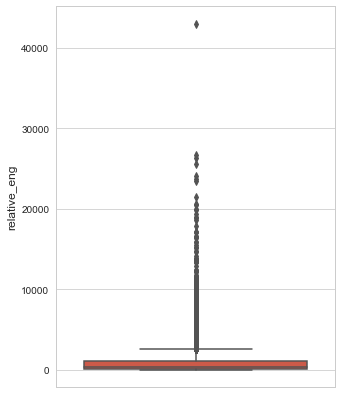

In [65]:
fig, ax = plt.subplots(figsize = (5, 7))
ax = sns.boxplot(data = df_c_m, y = "relative_eng")

#### Visualise posts in a histogram

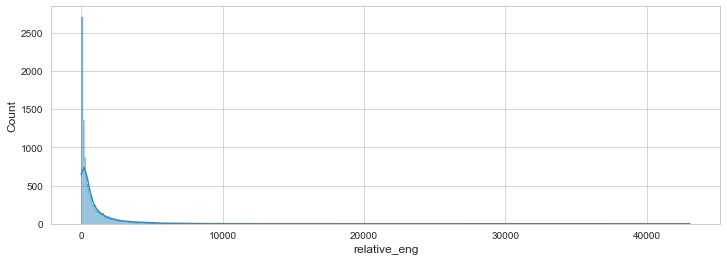

In [66]:
fig, ax = plt.subplots(figsize = (12, 4))
ax = sns.histplot(data = df_c_m, x = "relative_eng", kde = True, element = 'step')

### 5.3. Dealing with Outliers

#### Detect outliers

As it can be seen from the boxplot above, most of the data points have been compressed between certain relative engagement level. We should first detect outliers and then remove them for our analysis and model to be more accurate.

Let's look at the values that are more than 2 standard deviations away from the mean.

In [67]:
# calculate mean & standard deviation and define range multiplier
std = df_c_m['relative_eng'].std()
mean = df_c_m['relative_eng'].mean()
range_multiplier = 2

In [68]:
# add the new empty column
df_c_m['isOutlier'] = ""

# assign isOutlier values conditionally 
df_c_m['isOutlier'] = np.where(np.logical_or(df_c_m['relative_eng'] < (mean - range_multiplier * std),
                                             df_c_m['relative_eng'] > (mean + range_multiplier * std)),
                               'Yes', 
                               'No')

In [69]:
df_c_m['isOutlier'].value_counts()

No     10561
Yes      408
Name: isOutlier, dtype: int64

By defining 2 * standard deviation range to detect outliers, we detected 408 outliers from the data. Let's plot the visuals again to see the distribution of the data items.

#### Remove outliers

In [70]:
# remove outliers by filtering
df_or = df_c_m[df_c_m['isOutlier'] == 'No']

# reset the index
df_or.reset_index(drop = True, inplace = True)

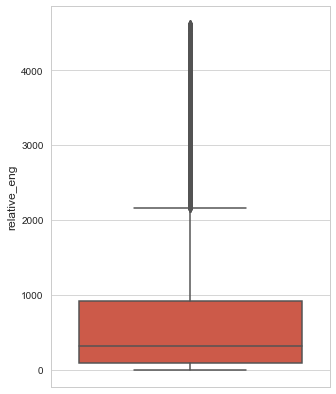

In [71]:
fig, ax = plt.subplots(figsize = (5, 7))
ax = sns.boxplot(data = df_or, y = "relative_eng")

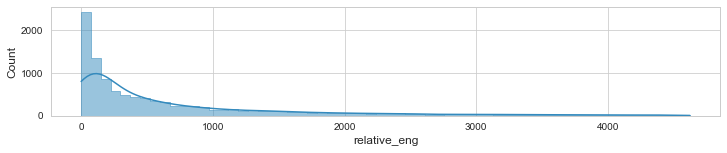

In [72]:
fig, ax = plt.subplots(figsize = (12, 2))
ax = sns.histplot(data = df_or, x = "relative_eng", kde = True, element = 'step')

#### Plot qqplot to validate the distribution

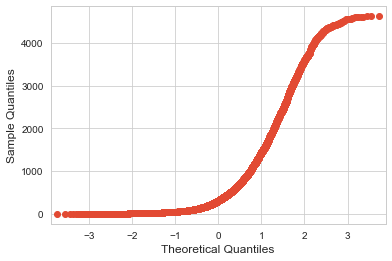

In [73]:
qq = sm.qqplot(df_or.relative_eng)
qq.show()

### 5.4. Data Transformation

#### Transform relative engagement variable with log function to normalize the distribution

We will add 1 to the relative_engagement column to avoid minus infinity value.

In [74]:
df_or['relative_eng_n'] = np.log(df_or['relative_eng']+1)

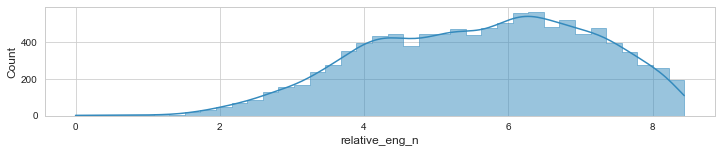

In [75]:
fig, ax = plt.subplots(figsize = (12, 2))
ax = sns.histplot(data = df_or, x = "relative_eng_n", kde = True, element = 'step')

#### Quick check on normalised relative engagement

In [76]:
df_or['relative_eng_n'].describe()

count    10561.000000
mean         5.604914
std          1.537804
min          0.000000
25%          4.433029
50%          5.738662
75%          6.815210
max          8.438763
Name: relative_eng_n, dtype: float64

#### Plot qqplot to validate the distribution after normalisation

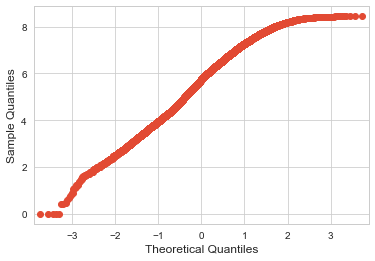

In [77]:
qq = sm.qqplot(df_or.relative_eng_n)
qq.show()

We can observe that the QQ plots before and after normalisation changes from positively skewed to normal distribution. 

### 5.5. Success class derivation

We will divide the normalised relative engagement field into two (successful or not successful) by using its **mean** and create our success labels. This will allow us to build binary classification model, **logistic regression**, in further steps.

In [78]:
df_or['success'] = np.where(df_or['relative_eng_n'] > df_or['relative_eng_n'].mean(), 1, 0)

In [79]:
df_or['success'].describe()

count    10561.000000
mean         0.524950
std          0.499401
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: success, dtype: float64

## 6. Feature Engineering

### 6.1. Frequency of Posts (by Company)

#### Calculate how frequent every company is posting in LinkedIn

To calculate this metric, we will use monthly aggregation. The reason why we do this monthly is that LinkedIn stores information in weeks, months, years ago structure. And since we assumed the posts with X months ago label as they are posted exactly X*30 days ago.

The algorithm should calculate how many posts have been posted by the corresponding company in that post's month. We will have a monthly frequency for every month for every company so that we can use this as a separate variable. 

In [80]:
df_fr = df_or.groupby(["company", "post_month"]).agg({'relative_eng':['count']})
df_fr.columns = df_fr.columns.droplevel(1)
df_fr.reset_index(level = [0, 1], inplace=True)
df_fr.rename(columns = {'relative_eng':'frequency'}, inplace = True)

In [81]:
df_fr.head()

company post_month  frequency
0    AT&T    2020-02         37
1    AT&T    2020-03         24
2    AT&T    2020-04         25
3    AT&T    2020-05         26
4    AT&T    2020-06         40

In [82]:
df_fr.sort_values('frequency', ascending = False).head(10)

company post_month  frequency
166   Cognizant    2021-02        237
473      VMware    2021-01        229
474      VMware    2021-02        219
165   Cognizant    2021-01        197
430  Salesforce    2020-12        178
425         SAP    2020-11        119
432  Salesforce    2021-02        111
431  Salesforce    2021-01        102
280      Huawei    2020-12         98
426         SAP    2020-12         97

In [83]:
# merge frequency data frame to main data frame
df_or = df_or.merge(df_fr, how = 'left', on = ['company', 'post_month'])

### 6.2. Text Analysis & Feature Derivation from Text

Content of the post is one of the 3 main elements of a post, and one of the main focuses of this analysis. So, the features we will extract from content will play a key role in our prediction model as well as answering main analytical questions of our analysis.

#### Initial cleaning

In [84]:
# have a look at an example post content
n = 3555

print('----\n')

for i in range(n, n + 2):
    print(df_or.content[i])
    print('-')

print('\n----')

----

HSBC is ranked #1 in India’s equity capital market (ECM) league table within the first nine months of 2020 as per the data by  Dealogic   Read more:  http://grp.hsbc/6046GFwTE 
 
 
 …see more
-
Investor confidence in emerging markets is up and risk appetite is rising, according to the latest HSBC Emerging Markets (EM) Investor Sentiment survey. Find out what EM investors are thinking now  http://grp.hsbc/6042GFDOq
-

----


In [85]:
df_or.content[n]

'HSBC is ranked #1 in India’s equity capital market (ECM) league table within the first nine months of 2020 as per the data by  Dealogic   Read more:  http://grp.hsbc/6046GFwTE \n \n \n …see more'

##### Lowering all the characters

For more consistent and accurate analysis, we will lower all the letters in the post content.

In [86]:
# use lower() method
df_or['content_modified'] = df_or['content'].str.lower()

##### Removing meaningless strings from content

Due to LinkedIn's interface, we see  **' \n \n \n …see more'** string in more than half of the posts. We will remove this string from these posts so that we can have the meaningful content of every post.

In [87]:
df_or[df_or['content_modified'].str.contains(" \n \n \n …see more", regex = False)].content.count()

6429

In [88]:
# remove the ' \n \n \n …see more' string from posts
df_or['content_modified'] = df_or['content_modified'].replace(r' \n \n \n …see more', '', regex = True)

In [89]:
df_or[df_or['content_modified'].str.contains(" \n \n \n …see more", regex = False)].content.count()

0

In [90]:
# have a look at the same content again
df_or.content_modified[n]

'hsbc is ranked #1 in india’s equity capital market (ecm) league table within the first nine months of 2020 as per the data by  dealogic   read more:  http://grp.hsbc/6046gfwte'

##### Drop foreign language posts

Also, in some posts, there are **'\n \n \n \n    see translation'** string due to some foreign language (non-english) posts. We will drop these rows because we are deriving features based on english and these can affect our analysis in a bad way.

In [91]:
len(df_or.index)

10561

In [92]:
df_or[df_or['content_modified'].str.contains(" \n \n \n \n    see translation", regex = False)].content.count()

77

In [93]:
df_or = df_or[~df_or.content_modified.str.contains(r' \n \n \n \n    see translation', regex = True)]

In [94]:
len(df_or.index)

10484

In [95]:
df_or[df_or['content_modified'].str.contains(" \n \n \n \n    see translation", regex = False)].content.count()

0

##### Removing unwanted characters from from content

There are some characters such as '•' and '▪' in various parts of the posts. So we will remove these for more accurate tokenization.

In [96]:
# quick check to understand how many unwanted characters are removed
df_or.content_modified.str.len().sum()

3179735

In [97]:
# various symbols that were manually detected while data observation in various steps
df_or['content_modified'] = df_or['content_modified'].replace(r'•', '', regex = True)
df_or['content_modified'] = df_or['content_modified'].replace(r'▪', '', regex = True)

In [98]:
# quick check to understand how many unwanted characters are removed
df_or.content_modified.str.len().sum()

3179697

In [99]:
# various symbols
regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)

df_or['content_modified'] = df_or['content_modified'].apply(lambda x: regrex_pattern.sub('', x))

# https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python

In [100]:
# quick check to understand how many unwanted characters are removed
df_or.content_modified.str.len().sum()

3177997

In [101]:
# multiple spaces
df_or['content_modified'] = df_or['content_modified'].replace('\s+', ' ', regex=True)

In [102]:
# quick check to understand how many unwanted characters are removed
df_or.content_modified.str.len().sum()

3129771

##### Remove URLs from content

All links contains either http or https. We can remove these by using regular expressions.

In [103]:
df_or['content_modified'] = df_or['content_modified'].apply(lambda x: re.sub('https:\/\/.*', '', x))

df_or['content_modified'] = df_or['content_modified'].apply(lambda x: re.sub('http:\/\/.*', '', x))

df_or['content_modified'] = df_or['content_modified'].apply(lambda x: re.sub('www\..*', '', x))

##### Remove hashtags from content

Since hashtags has no meaning in the post content and we will derive a new feature (number of hashtags) from them, we will remove hashtags from content.

In [104]:
df_or['content_modified'] = df_or['content_modified'].apply(lambda x: re.sub('#[A-Za-z0-9_]+', '', x))

##### Cleaning the beginning and the end of content

After removing meaningles strings, there may still be spaces at the beginning or at the end of every post, let's make sure we removed these too.

In [105]:
# use lstrip and rstrip methods
df_or.content_modified = df_or.content_modified.str.rstrip()
df_or.content_modified = df_or.content_modified.str.lstrip()

In [106]:
# have a look at the same content again
df_or.content_modified[n]

'hsbc is ranked  in india’s equity capital market (ecm) league table within the first nine months of 2020 as per the data by dealogic read more:'

##### Tokenize and remove stopwords & extra words & punctuations

For further steps, we will create a tokenized version of the content by removing stopwords and punctuations.

In [107]:
# tokenize
df_or['tokens'] = df_or.apply(lambda x: nltk.word_tokenize(x['content_modified']), axis = 1)

In [108]:
# define stop words
stop_words = (stopwords.words('english'))

In [109]:
# define extra words
extra_words = ["'s", "''", "jj"]

In [110]:
# define punctuations
punctuations = '''!()-,[]{};:'”“"'’`\,,<>./?@$%^&*_~#▪•—➡️'''

In [111]:
# remove stop words
df_or['tokens'] = df_or['tokens'].apply(lambda x: [word for word in x if not word in stop_words])

# remove stop words
df_or['tokens'] = df_or['tokens'].apply(lambda x: [word for word in x if not word in extra_words])

# remove punctuations
df_or['tokens'] = df_or['tokens'].apply(lambda x: [word for word in x if not word in punctuations])

##### Have a look at the final version of content and tokens samples from the data frame

In [112]:
# have a look at the same content again
df_or.content_modified[n]

'hsbc is ranked  in india’s equity capital market (ecm) league table within the first nine months of 2020 as per the data by dealogic read more:'

In [113]:
# have a look at the same content again
print(df_or.tokens[n])

['hsbc', 'ranked', 'india', 'equity', 'capital', 'market', 'ecm', 'league', 'table', 'within', 'first', 'nine', 'months', '2020', 'per', 'data', 'dealogic', 'read']


##### Reset the index

In [114]:
df_or.reset_index(drop = True, inplace = True)

When compared to the original, this content looks much more clear and contains what we want to analyse. We will use these two column for our feature derivation.

#### Length of the post

In [115]:
df_or['content_length'] = df_or['content_modified'].map(str).apply(len)

In [116]:
df_or.content_length.describe()

count    10484.000000
mean       255.688192
std        173.518513
min          0.000000
25%        147.000000
50%        211.500000
75%        301.000000
max       1295.000000
Name: content_length, dtype: float64

In [117]:
df_or[df_or['content_length'] == df_or['content_length'].max()]['content_modified']

5967    chloe carter, cinematics lead on the sims 4 & ...
Name: content_modified, dtype: object

#### Number of hastags in the post

In [118]:
df_or.no_hastags = df_or.content.str.count("#")

In [119]:
df_or.no_hastags.describe()

count    10484.000000
mean         1.660340
std          1.825693
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         21.000000
Name: content, dtype: float64

#### Any outbound links in the post

The existance of an outbound link may affect the performance of the post. We will create a binary column to show if there is an outbound link exits in the post content or not. To do that, we will use where() function and assign 1 if there is **'http'** substring in the content.

Assumption here is that every http string refers to an outbound link.

In [120]:
# filtering based on if a cell contains substring or not - regex = False if you want to look for the exact string
df_or['outbound_link'] = np.where(df_or['content'].str.contains("http", regex = False), 1, 0)

In [121]:
df_or.outbound_link.describe()

count    10484.000000
mean         0.692484
std          0.461487
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: outbound_link, dtype: float64

#### Number of tokens in the post

Number of words is also a strong way to understand how complex the sentence is, especially when combined with the length of post feature that we have derived previously.

In [122]:
# calculate number of words (tokens) in every post
df_or['no_words'] = df_or['tokens'].str.len()

In [123]:
df_or['no_words'].describe()

count    10484.000000
mean        24.518409
std         16.377992
min          0.000000
25%         14.000000
50%         20.000000
75%         29.000000
max        133.000000
Name: no_words, dtype: float64

In [124]:
df_or[df_or['no_words'] == df_or['no_words'].max()]['content_modified']

5971    we are proud to contribute to the  global init...
9678    sikta patnaik ’s exciting hul journey started ...
Name: content_modified, dtype: object

#### Average length of a word in the post

Use the tokens column to calculate the average word length in a post since tokens are the meaningful words that we want to analyse.

In [125]:
df_or['avg_word_length'] = df_or["tokens"].apply(lambda x: np.mean([len(w) for w in x]))

In [126]:
df_or['avg_word_length'].describe()

count    10475.000000
mean         6.495588
std          0.772149
min          2.000000
25%          6.000000
50%          6.480000
75%          7.000000
max         12.000000
Name: avg_word_length, dtype: float64

In [127]:
df_or[df_or['avg_word_length'] == df_or['avg_word_length'].max()]['content_modified']

1207    trailblazing.
Name: content_modified, dtype: object

In [128]:
df_or[df_or['avg_word_length'] >= 10]['content_modified']

1207                                        trailblazing.
1208                road-ready so you can be trail-ready.
4253    data-driven  thrives during transformation bec...
4263    data-driven  thrives during transformation bec...
4281    data-driven  thrives during transformation bec...
4297    data-driven  thrives during transformation bec...
Name: content_modified, dtype: object

Replace missing values with the mean of the column.

In [129]:
df_or['avg_word_length'].fillna(df_or['avg_word_length'].mean(), inplace = True)

#### Vocabulary complexity (Uniqueness) of the post

Proportion of terms that are not contained in the list of most common terms created by using all posts.

To do this,

- Step 1: Concatenate all tokens in one single list
- Step 2: Calculate the frequency of the unique tokens in this single list
- Step 3: Select most frequently used top words (size will be decided based on the derived feature, multiple iterations may be needed)
- Step 4: Calculate the proportion of terms that are not contained in the most frequently used top words list

In [130]:
# step 1
all_tokens = df_or.tokens.sum()

In [131]:
np.shape(all_tokens)

(257051,)

In [132]:
# step 2
token_freq = FreqDist(all_tokens)

In [133]:
token_freq

FreqDist({'learn': 2082, 'new': 1636, 'help': 1298, 'us': 1285, 'people': 1084, 'world': 1030, 'read': 1015, 'work': 1009, 'business': 977, 'team': 958, ...})

In [134]:
# convert frequency distribution to a dictionary
dict_token_freq = dict((all_tokens, freq) for all_tokens, freq in token_freq.items())

In [135]:
len(dict_token_freq)

23322

In [136]:
# step 3
df_token_freq = pd.DataFrame.from_dict(token_freq, orient = 'index')

df_token_freq.reset_index(inplace = True)
df_token_freq.rename(columns = {0:'frequency', 'index':'tokens'}, inplace = True)
df_token_freq.sort_values("frequency", ascending = False, inplace = True)
df_token_freq.reset_index(drop = True, inplace = True)

In [137]:
df_token_freq.head(5)

tokens  frequency
0   learn       2082
1     new       1636
2    help       1298
3      us       1285
4  people       1084

In [138]:
# step 4
top_tokens = df_token_freq.tokens.head(250).tolist()

In [139]:
# create an empty list
uniqueness = []

# define the loop for calculating uniqueness
for i in range(0, len(df_or.index)):
    diff = len(list(set(df_or.tokens[i]) - set(top_tokens)))
    total = len(df_or.tokens[i])
    if total == 0: 
        unq = 0
    else:
        unq = diff/total
    uniqueness.append(unq)
    i += 1

# add a uniqueness column with the calculated list
df_or['uniqueness'] = uniqueness

In [140]:
df_or['uniqueness'].describe()

count    10484.000000
mean         0.621777
std          0.135766
min          0.000000
25%          0.536585
50%          0.625000
75%          0.714286
max          1.000000
Name: uniqueness, dtype: float64

#### Sentiment analysis with TextBlob

We will calculate subjectivity of the content by TextBlob, an NLP library that allows to do sentiment analysis with a familiar interface. **sentiment** property of TextBlob returns polarity and subjectivity values.

https://textblob.readthedocs.io/en/dev/quickstart.html#sentiment-analysis

In [141]:
df_or.content_modified[n]

'hsbc continues to support local covid-19 recovery efforts across asia-pacific, whether through food packs, face masks, medical equipment or other relief initiatives:'

In [142]:
TextBlob(df_or.content_modified[n]).sentiment

Sentiment(polarity=-0.041666666666666664, subjectivity=0.125)

#### Subjectivity

In [143]:
df_or['content_subj'] = df_or['content_modified'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [144]:
df_or['content_subj'].describe()

count    10484.000000
mean         0.417422
std          0.231587
min          0.000000
25%          0.277273
50%          0.438636
75%          0.550000
max          1.000000
Name: content_subj, dtype: float64

#### Polarity

In [145]:
df_or['content_polr'] = df_or['content_modified'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [146]:
df_or['content_polr'].describe()

count    10484.000000
mean         0.212911
std          0.209861
min         -1.000000
25%          0.050000
50%          0.198542
75%          0.335714
max          1.000000
Name: content_polr, dtype: float64

## 7. Feature Selection

This step is to refine the data frame one last time before starting to check the relation & correlation between independent variables and dependent variable. The detailed feature selection for creating the regression model will be carried out after a detailed review of these relation & correlation.

In [147]:
df_or.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10484 entries, 0 to 10483
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   company           10484 non-null  object        
 1   sector            10484 non-null  object        
 2   followers         10484 non-null  int64         
 3   connections       10484 non-null  int64         
 4   comp_desc         10484 non-null  object        
 5   content           10484 non-null  object        
 6   media_type        10484 non-null  object        
 7   num_hashtags      10484 non-null  int64         
 8   reactions         10484 non-null  int64         
 9   comments          10484 non-null  int64         
 10  post_date         10484 non-null  datetime64[ns]
 11  post_month        10484 non-null  object        
 12  engagement        10484 non-null  int64         
 13  relative_eng      10484 non-null  float64       
 14  isOutlier         1048

In [148]:
df_or.head(2)

company                             sector  followers  \
0  Dell Technologies  Information Technology & Services    3597845   
1  Dell Technologies  Information Technology & Services    3597845   

   connections                                          comp_desc  \
0       194140  Dell Technologies is a unique family of busine...   
1       194140  Dell Technologies is a unique family of busine...   

                                             content media_type  num_hashtags  \
0  #ICYMI  check out the keynote replay from the ...      video             2   
1  “We need to move faster to address the digital...      image             1   

   reactions  comments  post_date post_month  engagement  relative_eng  \
0       1217       577 2021-02-08    2021-02        1794    815.471952   
1         76         2 2021-02-15    2021-02          78     35.455302   

  isOutlier  relative_eng_n  success  frequency  \
0        No        6.704993        1         44   
1        No        3.596087        0         44   

                                    content_modified  \
0  check out the keynote replay from the  on jan ...   
1  “we need to move faster to address the digital...   

                                              tokens  content_length  \
0  [check, keynote, replay, jan, 26th, followed, ...             299   
1  [need, move, faster, address, digital, inequit...             243   

   outbound_link  no_words  avg_word_length  uniqueness  content_subj  \
0              1        27         6.518519    0.629630        0.5125   
1              1        27         5.814815    0.592593        0.4000   

   content_polr  
0      0.250000  
1     -0.033333

### 7.1. Numerical Features

#### Select features to review

The **numerical** features we are going to investigate are: 
- num_hashtags
- frequency
- content_length
- no_words
- avg_word_length
- uniqueness
- content_subj
- content_polr

In [149]:
# transfer numerical features into a data frame, include dependent variable too (success) for checking the correlation
df_feature_num = df_or[['success', 'num_hashtags', 'frequency', 'content_length', 
                        'no_words', 'avg_word_length', 'uniqueness', 'content_subj', 
                        'content_polr']]

#### Check the distribution of numerical independent variables in dependent variable

In [150]:
df_feature_num.pivot_table(index = "success", #rows in the pivot table
                           values = ['num_hashtags', 'frequency', 'content_length', 'no_words', 
                                     'avg_word_length', 'uniqueness', 'content_subj', 'content_polr'], #values in the pivot table 
                           aggfunc = [np.mean] #summary statistics function to be applied in aggregation
                          )

mean                                                      \
        avg_word_length content_length content_polr content_subj  frequency   
success                                                                       
0              6.524658     223.386300     0.200631     0.405819  86.424869   
1              6.469307     284.892481     0.224013     0.427912  25.416636   

                                            
          no_words num_hashtags uniqueness  
success                                     
0        21.451185     1.480916   0.620334  
1        27.291500     1.810934   0.623081

#### Check the summary statistics

In [151]:
df_feature_num.describe()

success  num_hashtags     frequency  content_length      no_words  \
count  10484.000000  10484.000000  10484.000000    10484.000000  10484.000000   
mean       0.525181      1.654235     54.384491      255.688192     24.518409   
std        0.499389      1.822245     59.438350      173.518513     16.377992   
min        0.000000      0.000000      1.000000        0.000000      0.000000   
25%        0.000000      0.000000     18.000000      147.000000     14.000000   
50%        1.000000      1.000000     32.000000      211.500000     20.000000   
75%        1.000000      2.000000     61.000000      301.000000     29.000000   
max        1.000000     21.000000    237.000000     1295.000000    133.000000   

       avg_word_length    uniqueness  content_subj  content_polr  
count     10484.000000  10484.000000  10484.000000  10484.000000  
mean          6.495588      0.621777      0.417422      0.212911  
std           0.771818      0.135766      0.231587      0.209861  
min           2.000000      0.000000      0.000000     -1.000000  
25%           6.000000      0.536585      0.277273      0.050000  
50%           6.482120      0.625000      0.438636      0.198542  
75%           7.000000      0.714286      0.550000      0.335714  
max          12.000000      1.000000      1.000000      1.000000

#### Check the distributions

In [152]:
# transfer numerical features into a data frame for checking the correlation
df_feature_num_vz = df_or[['num_hashtags', 'frequency', 'content_length', 
                           'no_words', 'avg_word_length', 'uniqueness', 'content_subj', 
                           'content_polr']]

<Figure size 432x288 with 0 Axes>

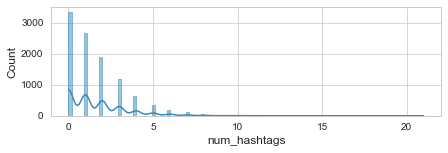

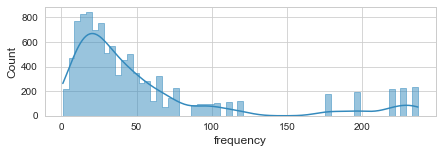

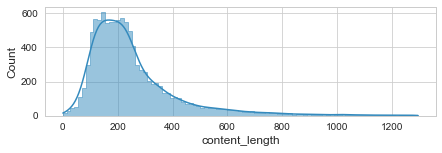

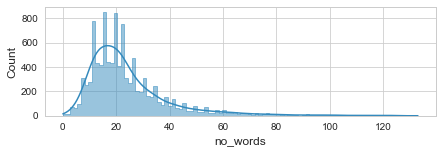

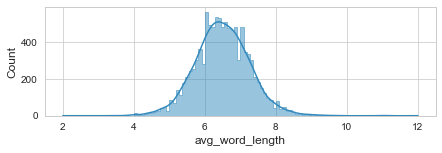

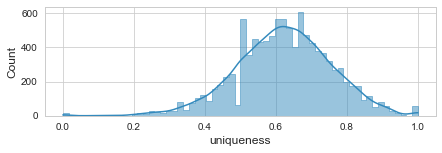

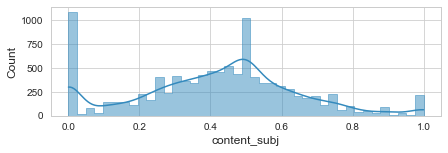

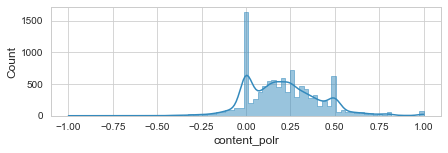

In [153]:
# visualise the distribution for all numerical variables
for i, c in enumerate(df_feature_num_vz.columns):
    plt.figure(i)
    plt.figure(figsize = (7, 2))
    sns.histplot(df_feature_num_vz[c], kde = True, element = 'step')

#### Check the correlation matrix

In [154]:
# create a correlation matrix for numerical features data frame
df_feature_num_corr = df_feature_num.corr(method = 'spearman')

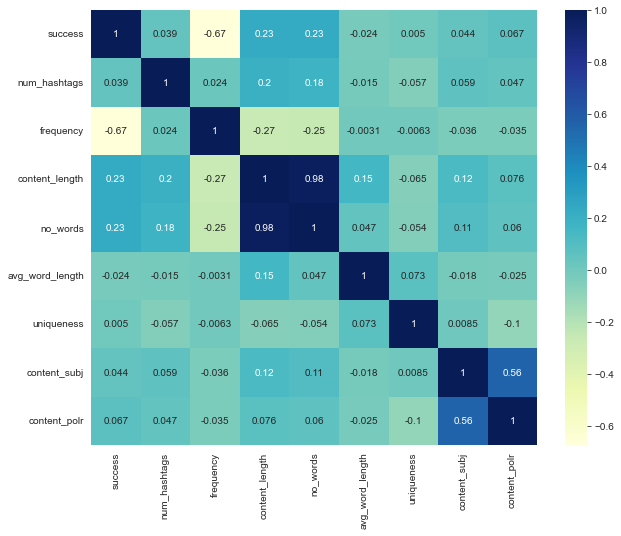

In [155]:
ax = plt.subplots(figsize = (10, 8))
ax = sns.heatmap(df_feature_num_corr, annot = True, cmap = "YlGnBu")

#### Normalize the skewed independent variables

In [156]:
df_feature_num['frequency_n'] = np.log(df_feature_num['frequency'])
df_feature_num['content_length_n'] = np.log(df_feature_num['content_length'])
df_feature_num['no_words_n'] = np.log(df_feature_num['no_words'])

In [157]:
df_feature_num_n = df_feature_num[['success', 'frequency_n', 'content_length_n', 'no_words_n']]

<Figure size 432x288 with 0 Axes>

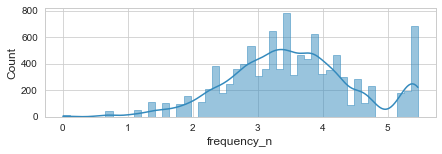

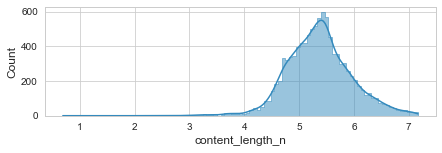

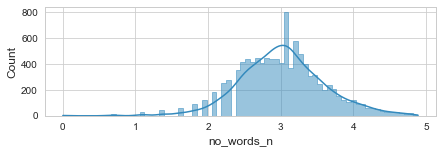

In [158]:
df_feature_num_n_vz = df_feature_num[['frequency_n', 'content_length_n', 'no_words_n']]

# visualise the distribution of normalised numerical variables
for i, c in enumerate(df_feature_num_n_vz.columns):
    plt.figure(i)
    plt.figure(figsize = (7, 2))
    sns.histplot(df_feature_num_n_vz[c], kde = True, element = 'step')

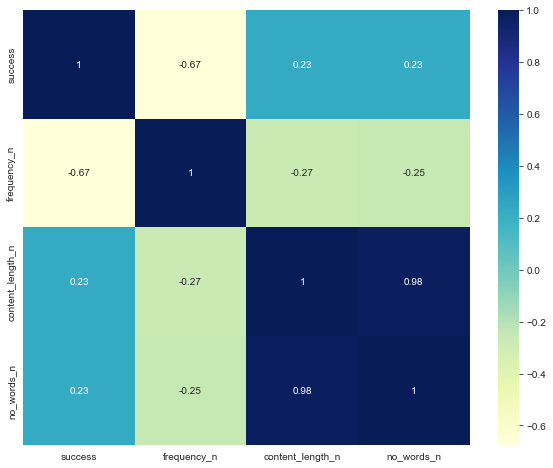

In [159]:
# create a correlation matrix for numerical features data frame
df_feature_num_n_corr = df_feature_num_n.corr(method = 'spearman')

# visualise
ax = plt.subplots(figsize = (10, 8))
ax = sns.heatmap(df_feature_num_n_corr, annot = True, cmap = "YlGnBu")

#### Comments

Among all the numerical features, only one of them having an adequate correlation with our dependent variable, and that is **frequency**. We will use this column as a numerical independent variable in our model.

#### Check the distribution of normalised frequency in success

In [160]:
f = df_feature_num[['frequency']]
t = df_feature_num[['success']]

df_selected_num = pd.concat([f, t], axis=1)

df_selected_num.head()

frequency  success
0         44        1
1         44        0
2         44        0
3         44        0
4         44        0

<AxesSubplot:xlabel='frequency', ylabel='success'>

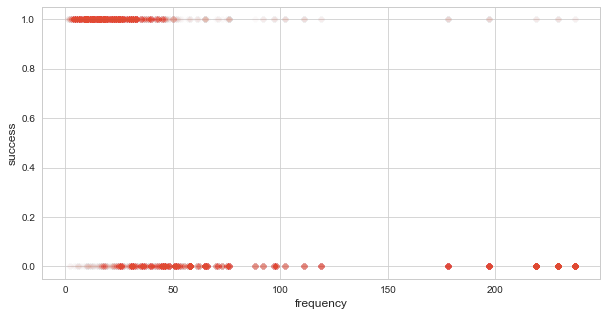

In [161]:
plt.figure(figsize = (10, 5))
sns.scatterplot(data = df_selected_num, 
                x = df_selected_num['frequency'], 
                y = df_selected_num['success'], 
                alpha = 0.006)

#### Further comments

By the help of adding opacity to the scatter chart, we are able to identify the distribution of success labels across normalised frequency variable.

### 7.2. Categorical Features

#### Select features to review

The **categorical** features we are going to investigate are: 
- media_type
- outbound_link

In [162]:
# transfer categorical features into a data frame, include dependent variable too (success) for checking the relationship
df_feature_cat = df_or[['success', 'media_type', 'outbound_link']]

#### Check the distribution of categories in dependent variable

In [163]:
df_feature_cat.groupby(['media_type'])['success'].value_counts(normalize=True).unstack()

success            0         1
media_type                    
article     0.503842  0.496158
document    0.575646  0.424354
entity           NaN  1.000000
image       0.433155  0.566845
poll        0.736842  0.263158
video       0.479134  0.520866

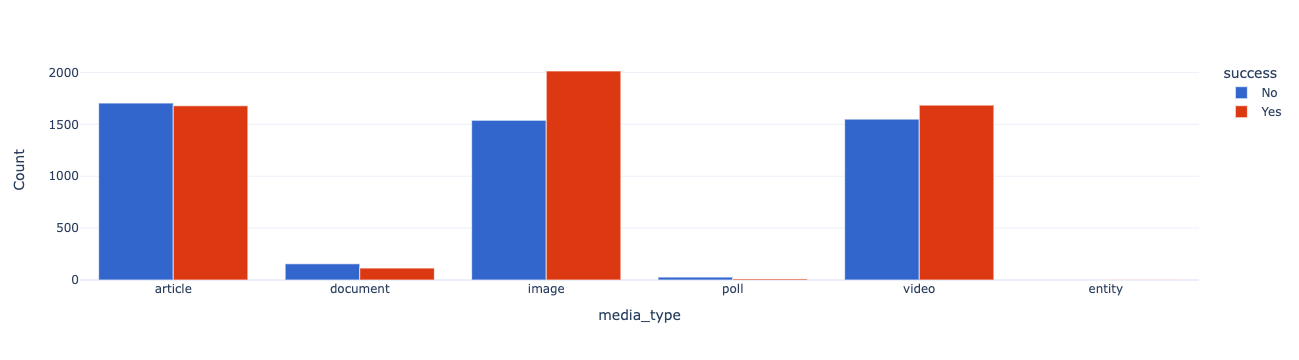

In [164]:
cat_mt = df_feature_cat.groupby(['media_type', 'success']).size()
df_cat_mt = pd.DataFrame(cat_mt)
df_cat_mt.reset_index(level = [0,1], inplace = True)
df_cat_mt.replace(0, 'No', inplace = True)
df_cat_mt.replace(1, 'Yes', inplace = True)
df_cat_mt.rename(columns = {0:'Count'}, inplace = True)

fig = px.bar(df_cat_mt, x = "media_type", y = "Count",
             color = 'success', barmode = 'group',
             height = 300,
             width = 500,
             template = 'plotly_white',
             color_discrete_sequence = px.colors.qualitative.G10)
fig.show()

In [165]:
df_feature_cat.groupby(['outbound_link'])['success'].value_counts(normalize=True).unstack()

success               0         1
outbound_link                    
0              0.301799  0.698201
1              0.551653  0.448347

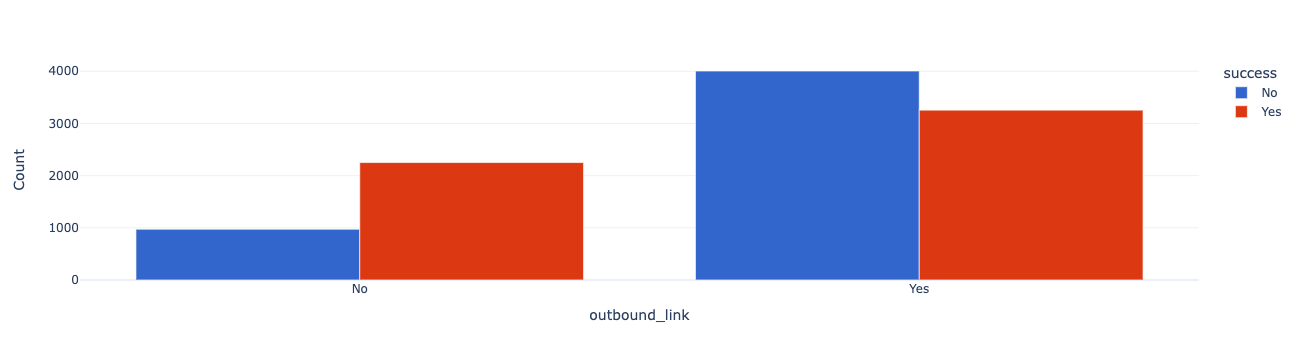

In [166]:
cat_ol = df_feature_cat.groupby(['outbound_link', 'success']).size()
df_cat_ol = pd.DataFrame(cat_ol)
df_cat_ol.reset_index(level = [0,1], inplace = True)
df_cat_ol.replace(0, 'No', inplace = True)
df_cat_ol.replace(1, 'Yes', inplace = True)
df_cat_ol.rename(columns = {0:'Count'}, inplace = True)

fig = px.bar(df_cat_ol, x = "outbound_link", y = "Count",
             color = 'success', barmode = 'group',
             height = 250,
             width = 500,
             template = 'plotly_white',
             color_discrete_sequence = px.colors.qualitative.G10)
fig.show()

#### Comments

By looking at the visuals only, the only categorical variable that looks like having a significant difference is **outbound_link**. Let's validate this using t-test to understand if the difference between the means is statistically different, that is, are the differences between the means different enough that they not due to sampling error?

#### Apply t-test

In [167]:
stats.ttest_ind(df_feature_cat[(df_feature_cat['success'] == 0)].outbound_link, 
                df_feature_cat[(df_feature_cat['success'] == 1)].outbound_link)

Ttest_indResult(statistic=24.295435153247396, pvalue=6.782477192000016e-127)

p value (6.78e-127) is much lower than 0.01 significance level. We can say that the difference between means of two samples are **significantly different**. This is a very low p value. To make sure, let's apply Null Hypothesis Significance Testing as well.

#### Apply Null Hypothesis Significance Testing (NHST)

Methodology for this section have been adopted from the corresponding lab tutorial notebook and it can be accessed from both URLs below:

- https://github.com/CityDataScienceTeaching/in3061_inm430_coursework_2021-emrecanokten/blob/master/week04/week04.ipynb
- https://github.com/emrecanokten/data_science_msc_city/blob/main/inm430_principles_of_data_science/labs/week04_inferential_statistics.ipynb

##### Step 1: Set up the null hypothesis, alternative hypothesis, and significance level

Here, we want to check if there is any difference between the population proportion of posts with and without an outbound link being successful. We will start with **the assumption that there is no difference**.

- Ho: p1 - p2 = 0

This is our **null hypothesis**. Here, p1 is the population proportion of successful posts having outbound link and p2 is the population proportion of unsuccessful posts having outbound link.

The **alternative hypothesis** will be that **there is a difference**.

- Ha: p1 - p2 != 0

Let’s use the significance level of 0.1 or 10%.

##### Step 2: Prepare a chart that shows the population proportion of posts with and without an outbound link being successful or not and the total number of posts with and without an outbound link.

In [168]:
p = df_feature_cat.groupby("outbound_link")["success"].agg([lambda z: np.mean(z == 1), "size"])
p.columns = ["Success", 'Total']

In [169]:
p

Success  Total
outbound_link                 
0              0.698201   3224
1              0.448347   7260

##### Step 3: Calculate the test statistic

In [170]:
p_0 = p.Success[0]
p_1 = p.Success[1]

In [171]:
# standard error
p_tot = len(df_feature_cat[df_feature_cat['success'] == 1]) / len(df_feature_cat)

n1 = p.Total[0]
n2 = p.Total[1]

se = np.sqrt(p_tot * (1 - p_tot) * (1 / n1 + 1 / n2))

In [172]:
se

0.010568569716503775

Here, p_tot is the total population proportion of the successful posts in the sample. n1 and n2 are the total numbers of populations of posts with and without an outbound link in the sample.

Now, use this standard error and calculate the test statistic.

In [173]:
# the best estimate
be = p_0 - p_1

# the hypothesized estimate
# null hypothesis is p1 - p2 = 0
he = 0  

# the test statistic
test_statistic = (be - he) / se

test_statistic

23.64122031836014

The calculated test_statistic is 23.64. That means that the observed difference in sample proportions is 23.64 estimated standard error below the hypothesized value.

##### Step 4: Calculate the p-value

In [174]:
pvalue = 2 * dist.norm.cdf(-np.abs(test_statistic))

pvalue

1.4531780705461201e-123

The p-value is 1.45e-123. That means more than 1.45e-121% of the time we would see that the results we observed are true considering the null hypothesis is true.

In another way, the p-value is much lower than the significance level (0.1). So, we have enough evidence to reject the null hypothesis.

The population proportion of successful posts with an outbound link is **significantly different** than the population proportion of successful posts without an outbound link.

This also validates that the observed difference in the sample is large enough that it is **not due to a sampling error**.

**So, we can use this in our model as an independent variable.**

## 8. Model Construction

### 8.1. Model Selection

Since we are dealing with a binary classification problem, that is predicting if a post will be successful or not, we will use **logistic regression** to predict the binary classification.

### 8.2. Data Preparation for Model

#### Feature data frame

In [175]:
feature_num = df_feature_num[['frequency']]

In [176]:
feature_num.shape

(10484, 1)

In [177]:
feature_cat = df_feature_cat[['outbound_link']]

In [178]:
feature_cat.shape

(10484, 1)

In [179]:
# combine numerical and categorical feature data frames
feature = pd.concat([feature_num, feature_cat], axis=1)

In [180]:
feature.shape

(10484, 2)

In [181]:
# scale the continuous independent variable (frequency_n) in the feature data frame
scaler = StandardScaler()
feature[['frequency']] = scaler.fit_transform(feature[['frequency']])

In [182]:
# check final feature data frame
feature.head()

frequency  outbound_link
0  -0.174719              1
1  -0.174719              1
2  -0.174719              0
3  -0.174719              0
4  -0.174719              1

#### Target data frame

In [183]:
target = df_or[['success']]

In [184]:
target.shape

(10484, 1)

In [185]:
# check final target data frame
target.head()

success
0        1
1        0
2        0
3        0
4        0

### 8.3. Split the Data

In [186]:
# split the data into training/testing sets
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size = 0.1, random_state = 42)

print('---')
print("Shape of the independent variable's training dataset: ", feature_train.shape)
print("Shape of the independent variable's test dataset: ", feature_test.shape)
print('---')
print("Shape of the dependent variable's training dataset: ", target_train.shape)
print("Shape of the dependent variable's test dataset: ", target_test.shape)
print('---')

---
Shape of the independent variable's training dataset:  (9435, 2)
Shape of the independent variable's test dataset:  (1049, 2)
---
Shape of the dependent variable's training dataset:  (9435, 1)
Shape of the dependent variable's test dataset:  (1049, 1)
---


### 8.4. Build the Model

In [187]:
# make a model instance
logisticRegr = LogisticRegression()

# train the model with training data
logisticRegr.fit(feature_train, target_train)

# make a prediction using feature test
predictions = logisticRegr.predict(feature_test)

# measure the performance of the model
score = logisticRegr.score(feature_test, target_test).round(2)

### 8.5 Model Evaluation

#### Classification report

In [188]:
print(classification_report(target_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.73      0.79       507
           1       0.78      0.89      0.83       542

    accuracy                           0.82      1049
   macro avg       0.82      0.81      0.81      1049
weighted avg       0.82      0.82      0.81      1049



#### Coefficients

In [189]:
logisticRegr.coef_

array([[-2.99443256, -0.81028651]])

#### Confusion Matrix

In [190]:
cm = metrics.confusion_matrix(target_test, predictions)
print(cm)

[[370 137]
 [ 57 485]]


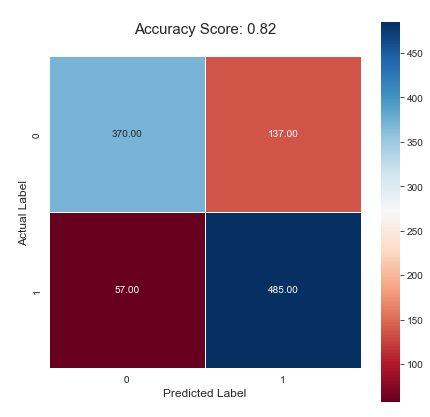

In [191]:
plt.figure(figsize = (7, 7))
sns.heatmap(cm, annot = True, fmt = ".2f", linewidths = .5, square = True, cmap = 'RdBu');
plt.ylabel('\nActual Label');
plt.xlabel('Predicted Label\n');
all_sample_title = '\nAccuracy Score: {0}\n'.format(score)
plt.title(all_sample_title, size = 15);

#### Comments

Out of **1049 predictions** that our model made in the test data:

- 485 of them are **True Positives**, posts are successful and we predicted as successful correctly.
- 370 of them are **True Negatives**, posts are not successful and we predicted as not successful correctly.
- 57 of them are **False Positives**, posts are successful and we did not predict correctly.
- 137 of them are **False Negatives**, posts are not successful and we did not predict correctly.

### 8.5 Model Interpretation

We have negative coefficients for both of our independent variables, this suggests that as the independent variables increase probability of success decreases.
- As the frequency increases, probability of success = 1 decreases.
- As the outbound_link increases, probability of success = 1 decreases.
- Since the absolute value of the coefficient of frequency variable is higher than that of outbound_link variable, i.e. as frequency increases the probability of success decreases more than the decrease caused by outbound_linke variable increase.

In the light of this information, and with the assumption that the LinkedIn posts having more relative engagement than average relative engagement are successful, we can make the comments below:
- Frequency of posting in LinkedIn and outbound link inclusion in a post are the most effective factors on the success of a post amongst all other features in the data set.
- Companies should decrease monthly posting frequency to increase the possibility of their post to be successful (to have a relative engagement above average).
- Companies should avoid including outbound links in their posts to increase the possibility of success of their posts.

## 9. Dimension Reduction

### 9.1 Data Preparation for MDS

In [192]:
df_mds = df_or.groupby(["sector"]).agg({'followers':['mean'], 
                                        'connections':['mean'], 
                                        'num_hashtags':['mean'], 
                                        'reactions':['mean'], 
                                        'comments':['mean'], 
                                        'relative_eng':['mean'], 
                                        'frequency':['mean'], 
                                        'content_length':['mean'], 
                                        'outbound_link':['mean'], 
                                        'avg_word_length':['mean'], 
                                        'uniqueness':['mean'], 
                                        'content_subj':['mean'], 
                                        'content_polr':['mean'],
                                        'relative_eng':['mean']})
df_mds.columns = df_mds.columns.droplevel(1)
df_mds.reset_index(inplace = True)

In [193]:
df_mds_dim = df_mds.drop(['sector', 'relative_eng'], axis=1)

### 9.2 Distance Matrix

In [194]:
# calculate the distance matrix
distMatrix = euclidean_distances(df_mds_dim, df_mds_dim)

### 9.3 Multidimensional Scaling

In [195]:
# create mds object
mds = MDS(n_components = 2, random_state = 5)

In [196]:
df_mds_dim.shape

(23, 12)

In [197]:
# perdorm mds
mds_dim_transformed = mds.fit_transform(df_mds_dim)
df_mds_dim_transformed = pd.DataFrame(mds_dim_transformed)

In [198]:
df_mds_dim_transformed.shape

(23, 2)

### 9.4. Visualise

In [199]:
df_mds_viz = pd.concat([df_mds_dim_transformed, df_mds['sector']], axis=1)

# for size
df_mds_viz = pd.concat([df_mds_viz, df_mds['relative_eng']], axis=1)

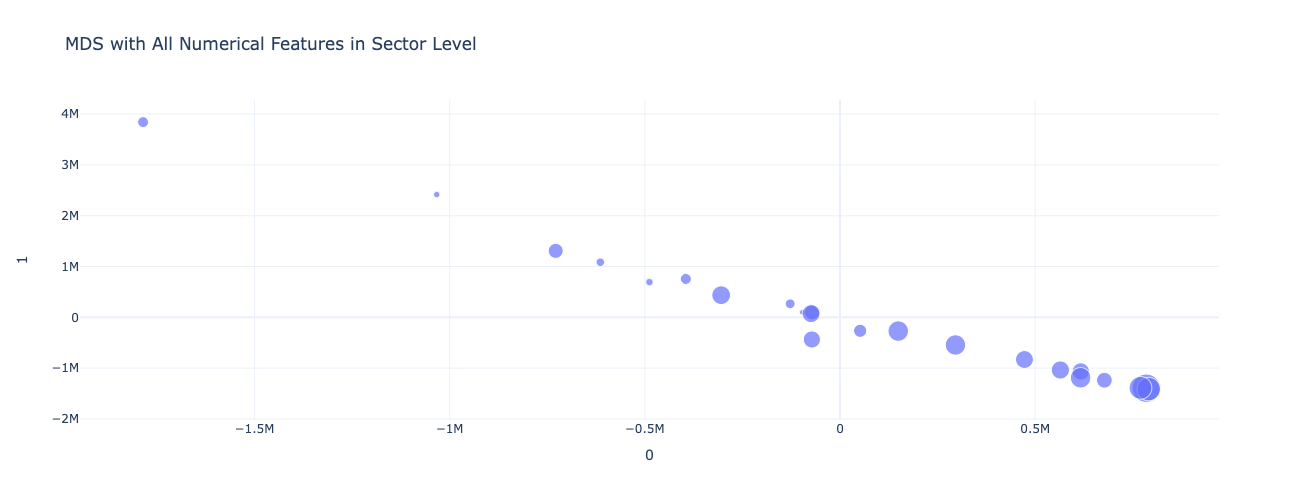

In [200]:
fig = px.scatter(df_mds_viz, 
                 x = 0, 
                 y = 1,
                 hover_name = "sector",
                 size = 'relative_eng',
                 height = 500,
                 width = 1000,
                 title = 'MDS with All Numerical Features in Sector Level',
                 template = 'plotly_white'
                )

#fig.update_traces(textposition='top center')

fig.show()

#### Comments

Since we added all numerical features to the dimension reduction model, this view gives us a very general view about how close each sector is to anothers. However, it does not tell us about any similarity or difference of sectors in in any of the specific digital marketing related aspects. Let's try to select relevant features to include in separate MDS models so that they are explainable and interpretable.

In our data, we derived many features from the post content, and we will use these content-related features to understand the similarity and difference between companies' content-wise digital marketing strategy.

### 9.5. MDS with Selected Features

#### Content-wise digital marketing strategy similarity

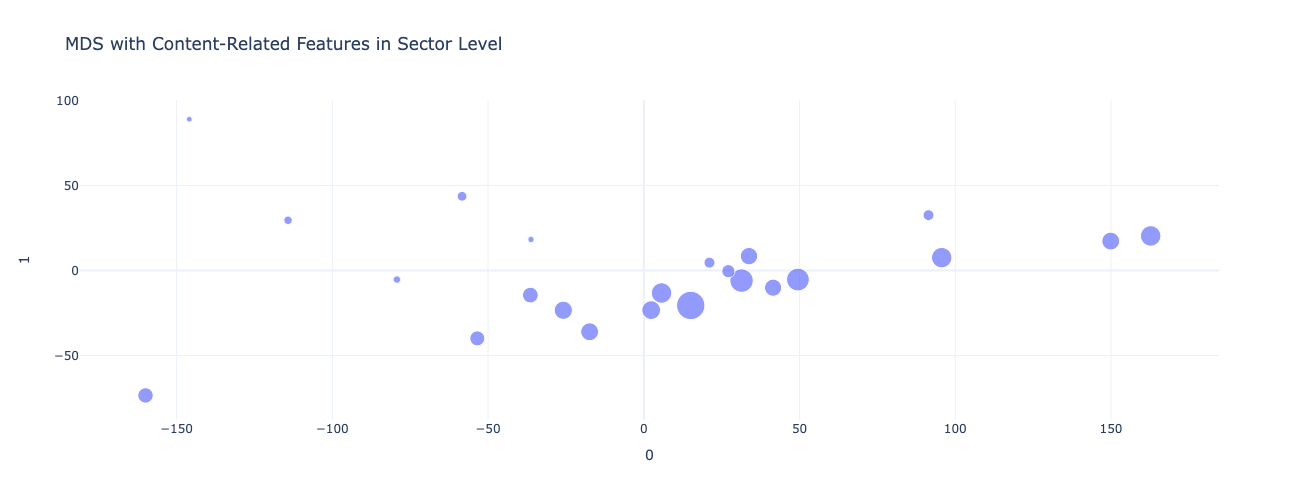

In [201]:
df_mds = df_or.groupby(["sector"]).agg({'num_hashtags':['mean'], 
                                        'frequency':['mean'], 
                                        'content_length':['mean'], 
                                        'outbound_link':['mean'], 
                                        'avg_word_length':['mean'], 
                                        'uniqueness':['mean'], 
                                        'content_subj':['mean'], 
                                        'content_polr':['mean'], 
                                        'relative_eng':['mean']})

df_mds.columns = df_mds.columns.droplevel(1)
df_mds.reset_index(inplace = True)

df_mds_dim = df_mds.drop(['sector', 'relative_eng'], axis=1)

# calculate the distance matrix
distMatrix = euclidean_distances(df_mds_dim, df_mds_dim)

# create mds object
mds = MDS(n_components = 2, random_state = 5)

# perdorm mds
mds_dim_transformed = mds.fit_transform(df_mds_dim)
df_mds_dim_transformed = pd.DataFrame(mds_dim_transformed)

df_mds_viz = pd.concat([df_mds_dim_transformed, df_mds['sector']], axis=1)
df_mds_viz = pd.concat([df_mds_viz, df_mds['relative_eng']], axis=1)

fig = px.scatter(df_mds_viz, 
                 x = 0, 
                 y = 1,
                 hover_name = "sector",
                 size = 'relative_eng',
                 height = 500,
                 width = 1000,
                 title = 'MDS with Content-Related Features in Sector Level',
                 template = 'plotly_white'
                )

#fig.update_traces(textposition='top center')

fig.show()

#### Comments

With only content-related features selected, we can see that there are certain sectors whose content-wise digital marketing strategy are similar to each other such as Retail & Computer Games and Machinery & Consumer Goods pairs.

We can also see that some of the sectors have different content-wise digital marketing strategy than others such as Computer Software and Electrical and Electronic Manufacturing.

Now, let's try to identify if companies in the same sectors are similar to each other or not. To do that, we will need to color the data items based on their sectors. The trouble here is that we have 45 companies and 23 sectors, so we won't be able to separate one sector from each other accurately with coloring. 

As a potential solution let's group the sectors so that we can reduce the number of total sectors to a reasonable number of sector groups.

### 9.6. MDS with Selected Features in Company Level

#### Check the sector and company variables

In [202]:
df_or.sector.nunique()

23

In [203]:
df_or.sector.unique()

array(['Information Technology & Services', 'Telecommunications',
       'Financial Services', 'Automotive', 'Hospital & Health Care',
       'Restaurants', 'Electrical & Electronic Manufacturing',
       'Industrial Automation', 'Computer Software', 'Retail',
       'Insurance', 'Pharmaceuticals', 'Aviation & Aerospace', 'Internet',
       'Computer Games', 'Machinery', 'Oil & Energy',
       'Health, Wellness & Fitness', 'Utilities', 'Biotechnology',
       'Entertainment', 'Building Materials', 'Consumer Goods'],
      dtype=object)

In [204]:
df_or.company.nunique()

45

In [205]:
df_or.company.unique()

array(['Dell Technologies', 'AT&T', 'Allianz',
       'American Honda Motor Company, Inc.', 'Huawei', 'Philips',
       'Volkswagen AG', "McDonald's", 'Honeywell', 'Kia Motors America',
       'BMW Group', 'Mercedes-Benz USA', 'Siemens', 'SAP', 'HSBC',
       'Tesco', 'MetLife', 'Merck Group', 'Cognizant',
       'Hewlett Packard Enterprise', 'VMware', 'Boeing', 'eBay', 'Uber',
       'Electronic Arts (EA)', 'Aflac', 'Caterpillar Inc.', 'Pfizer',
       'Chevron', 'Cigna', 'Exelon', 'Biogen', 'Fiserv', 'ViacomCBS',
       'Ford Motor Company', 'Best Buy', 'Salesforce', 'Carrier',
       'Colgate-Palmolive', 'ITC Limited', 'Unilever', 'PACCAR', 'Kroger',
       'Charles Schwab', 'John Deere'], dtype=object)

- **Section C – Manufacturing**
    - Consumer Goods
    - Automotive
    - Pharmaceuticals
    - Industrial Automation
    - Machinery
    - Aviation & Aerospace
    - Building Materials
    - Electrical & Electronic Manufacturing
- **Section D – Electricity, gas, steam, and air conditioning supply**
    - Oil & Energy
    - Utilities
- **Section G – Wholesale and retail trade; repair of motor vehicles and motorcycles**
    - Retail
- **Section I – Accommodation and food service**
    - Restaurants
- **Section J – Information and communication**
    - Information Technology & Services
    - Computer Software
    - Telecommunications
    - Internet
- **Section K – Financial and insurance activities**
    - Financial Services
    - Insurance
- **Section M – Professional, scientific and technical activities**
    - Biotechnology
- **Section Q – Human health and social work activities**
    - Health, Wellness & Fitness
    - Hospital & Health Care
- **Section R – Arts, entertainment and recreation**
    - Entertainment
    - Computer Games

In [206]:
# initialize list of lists with shortened name of groups
data = [['Section C: Manufacturing', 'Consumer Goods'], 
        ['Section C: Manufacturing', 'Automotive'], 
        ['Section C: Manufacturing', 'Pharmaceuticals'], 
        ['Section C: Manufacturing', 'Industrial Automation'], 
        ['Section C: Manufacturing', 'Machinery'], 
        ['Section C: Manufacturing', 'Aviation & Aerospace'], 
        ['Section C: Manufacturing', 'Building Materials'], 
        ['Section C: Manufacturing', 'Electrical & Electronic Manufacturing'], 
        ['Section D: Energy', 'Oil & Energy'], 
        ['Section D: Energy', 'Utilities'], 
        ['Section G: Retail', 'Retail'], 
        ['Section I: Food Service', 'Restaurants'], 
        ['Section J: Technology', 'Information Technology & Services'], 
        ['Section J: Technology', 'Computer Software'], 
        ['Section J: Technology', 'Telecommunications'], 
        ['Section J: Technology', 'Internet'], 
        ['Section K: Financial', 'Financial Services'], 
        ['Section K: Financial', 'Insurance'], 
        ['Section M: Science', 'Biotechnology'], 
        ['Section Q: Health', 'Health, Wellness & Fitness'], 
        ['Section Q: Health', 'Hospital & Health Care'], 
        ['Section R: Entertainment', 'Entertainment'], 
        ['Section R: Entertainment', 'Computer Games']]

# create the pandas dataframe
df_grouped_sector = pd.DataFrame(data, columns = ['group', 'sector'])

In [207]:
df_or = df_or.merge(df_grouped_sector, how = 'left', on = 'sector')

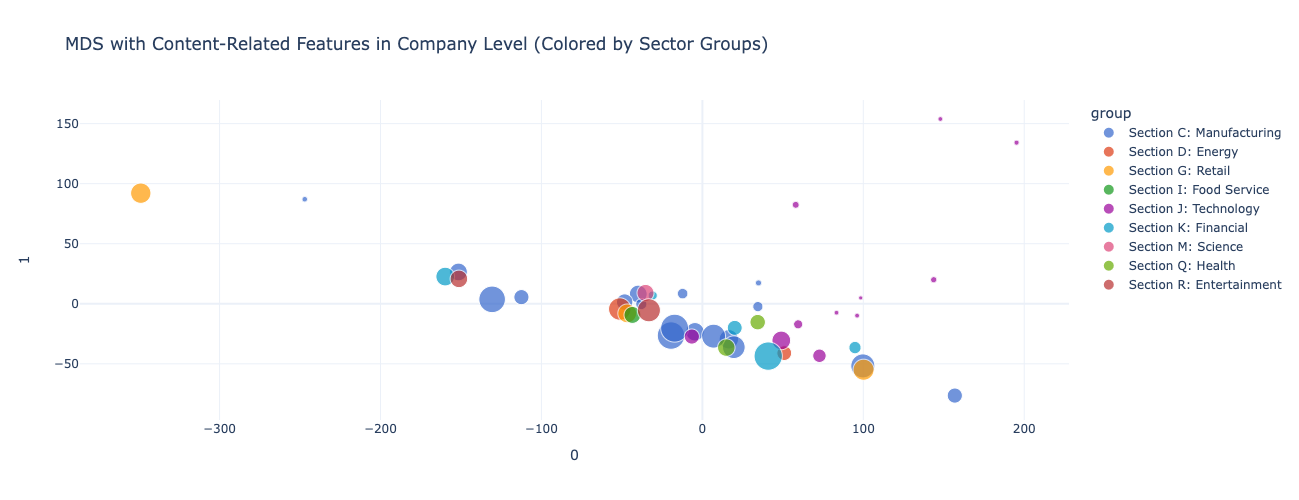

In [208]:
df_mds = df_or.groupby(["group", "sector", "company"]).agg({'num_hashtags':['mean'], 
                                                            'frequency':['mean'], 
                                                            'content_length':['mean'], 
                                                            'outbound_link':['mean'], 
                                                            'avg_word_length':['mean'], 
                                                            'uniqueness':['mean'], 
                                                            'content_subj':['mean'], 
                                                            'content_polr':['mean'],
                                                            'relative_eng':['mean']
                                                           })

df_mds.columns = df_mds.columns.droplevel(1)
df_mds.reset_index(level = [0,1,2], inplace = True)

df_mds_dim = df_mds.drop(['group', 'company', 'sector', 'relative_eng'], axis=1)

# calculate the distance matrix
distMatrix = euclidean_distances(df_mds_dim, df_mds_dim)

# create mds object
mds = MDS(n_components = 2, random_state = 5)

# perdorm mds
mds_dim_transformed = mds.fit_transform(df_mds_dim)
df_mds_dim_transformed = pd.DataFrame(mds_dim_transformed)

df_mds_viz = pd.concat([df_mds_dim_transformed, df_mds['group']], axis=1)
df_mds_viz = pd.concat([df_mds_viz, df_mds['sector']], axis=1)
df_mds_viz = pd.concat([df_mds_viz, df_mds['company']], axis=1)
df_mds_viz = pd.concat([df_mds_viz, df_mds['relative_eng']], axis=1)

fig = px.scatter(df_mds_viz, 
                 x = 0, 
                 y = 1,
                 hover_name = "group",
                 hover_data = ['company', 'sector'],
                 color = 'group',
                 size = 'relative_eng',
                 height = 500,
                 width = 1000,
                 title = 'MDS with Content-Related Features in Company Level (Colored by Sector Groups)',
                 template = 'plotly_white',
                 color_discrete_sequence = px.colors.qualitative.G10
                )

fig.show()

#### Comments

While some companies in technology have very similar content-wise digital marketing strategy to each other (**Hewlett Packard Enterprise, Dell Technologies, Huawei**), there are also some that have a very different strategy (**Cognizant**).

While most companies in manufacturing have similar content-wise digital marketing strategy to each other (the cluster in the middle containing **Kia Motors America, Carrier, Boeing, John Deere, Ford Motor Company, Mercedes-Benz USA**), there are also some that have a very different strategy (**Siemens**).

## 10. Content-Related Feature Trend

### 10.1. Trends for All Companies

At the last stage of the analysis, we will look at how content-related features changed over time.

To do this,

- Step 1: Sort the data ascending in time to have tokens used from the earliest date to the latest date
- Step 2: Select content-related features and the post date
- Step 3: Group the data by post date and calculate means of all features
- Step 4: Plot the trend lines

In [209]:
# step 1
df_or_timeline = df_or.sort_values('post_date', ascending = True)
df_or_timeline.reset_index(drop = True, inplace = True)

In [210]:
# step 2
df_or_timeline_sl = df_or_timeline[['num_hashtags', 'frequency', 'content_length', 
                                    'outbound_link', 'avg_word_length', 'uniqueness', 
                                    'content_subj', 'content_polr', 'post_month']]

In [211]:
# step 3
df_or_timeline_sl_gr = df_or_timeline_sl.groupby(['post_month']).agg({'num_hashtags':['mean'], 
                                                                     'frequency':['mean'], 
                                                                     'content_length':['mean'], 
                                                                     'outbound_link':['mean'], 
                                                                     'avg_word_length':['mean'], 
                                                                     'uniqueness':['mean'], 
                                                                     'content_subj':['mean'], 
                                                                     'content_polr':['mean']})

df_or_timeline_sl_gr.columns = df_or_timeline_sl_gr.columns.droplevel(1)
df_or_timeline_sl_gr.reset_index(level = 0, inplace = True)

<Figure size 432x288 with 0 Axes>

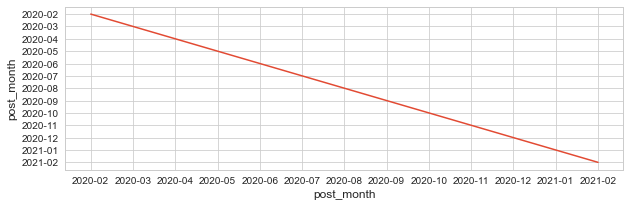

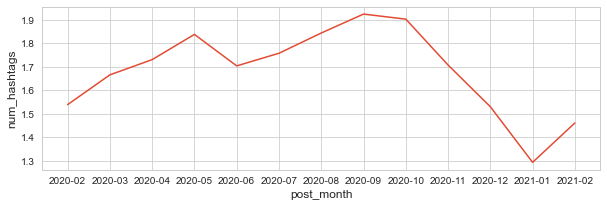

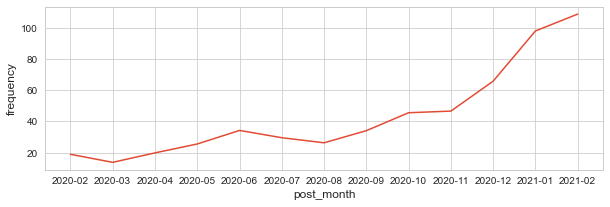

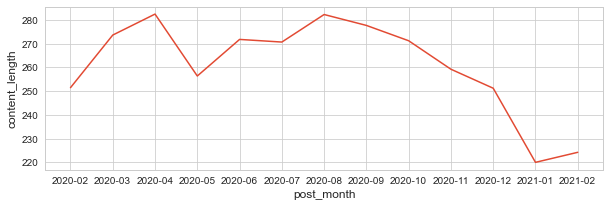

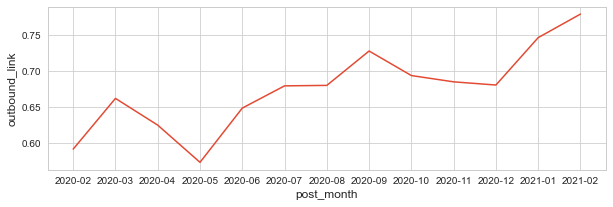

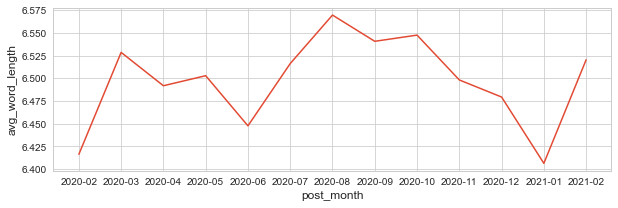

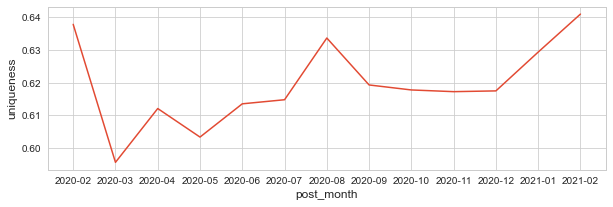

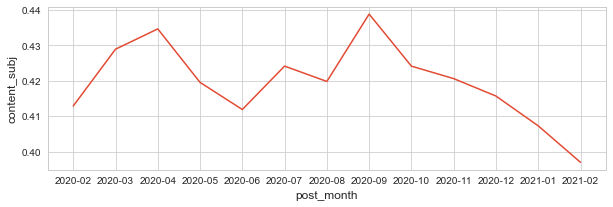

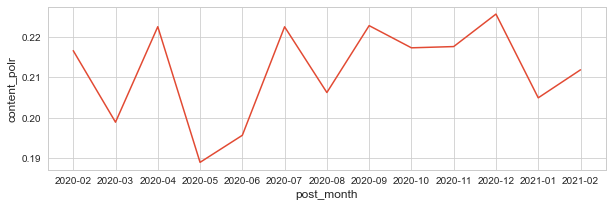

In [212]:
# step 4
for i, c in enumerate(df_or_timeline_sl_gr.columns):
    plt.figure(i)
    plt.figure(figsize = (10, 3))
    sns.lineplot(data = df_or_timeline_sl_gr, 
                    x = df_or_timeline_sl_gr['post_month'], 
                    y = df_or_timeline_sl_gr[c],
                    alpha = 1)

#### Comments

Observed trends over time:
- The number of hashtags used decreases after September 2020.
- The frequency of the posts increases consistently.
- Content length decreases by almost 20% after a consistent period of 9 months.
- Outbound link inclusion increases by time.
- Uniqueness increases by time. But as an another important observation, it tends to increase in the first two months of the year.

### 10.2. Trends for the Most Successful Companies

Let's filter the main data frame for the most successful 10 companies to see how their content-related feature, thus digital marketing strategies have been changed over time.

In [213]:
# step 0
top10 = df_check3.company.head(10).tolist()
df_or_top10 = df_or[df_or['company'].isin(top10)]

In [214]:
# step 1
df_or_timeline = df_or_top10.sort_values('post_date', ascending = True)
df_or_timeline.reset_index(drop = True, inplace = True)

In [215]:
# step 2
df_or_timeline_sl = df_or_timeline[['num_hashtags', 'frequency', 'content_length', 
                                    'outbound_link', 'avg_word_length', 'uniqueness', 
                                    'content_subj', 'content_polr', 'post_month']]

In [216]:
# step 3
df_or_timeline_sl_gr = df_or_timeline_sl.groupby(['post_month']).agg({'num_hashtags':['mean'], 
                                                                      'frequency':['mean'], 
                                                                      'content_length':['mean'], 
                                                                      'outbound_link':['mean'], 
                                                                      'avg_word_length':['mean'], 
                                                                      'uniqueness':['mean'], 
                                                                      'content_subj':['mean'], 
                                                                      'content_polr':['mean']})

df_or_timeline_sl_gr.columns = df_or_timeline_sl_gr.columns.droplevel(1)
df_or_timeline_sl_gr.reset_index(level = 0, inplace = True)

<Figure size 432x288 with 0 Axes>

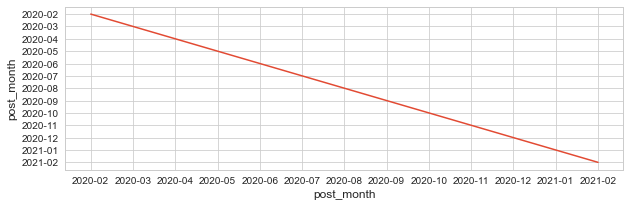

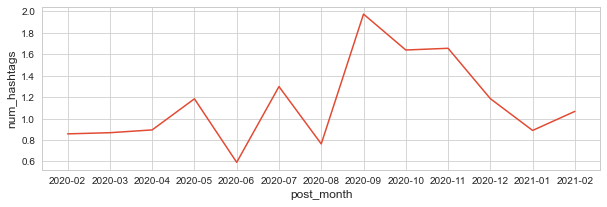

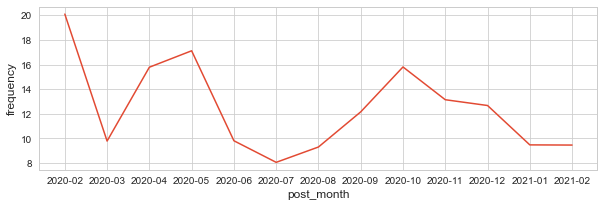

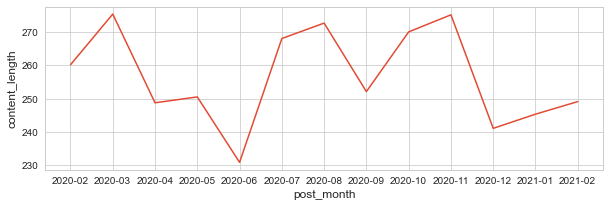

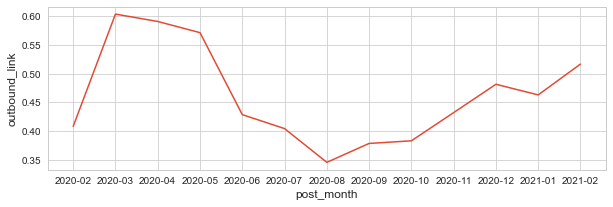

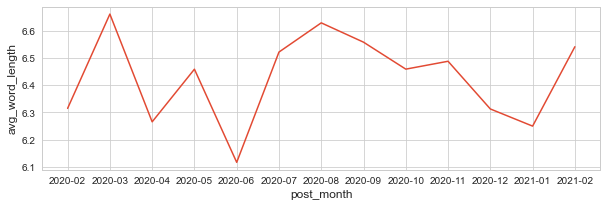

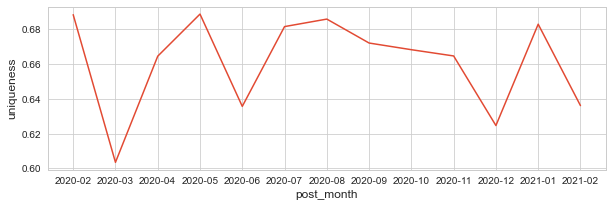

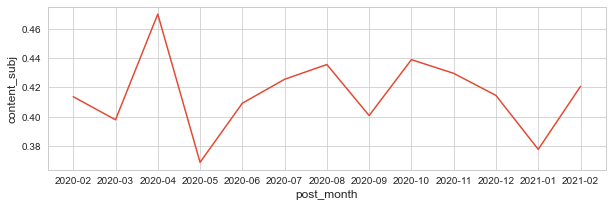

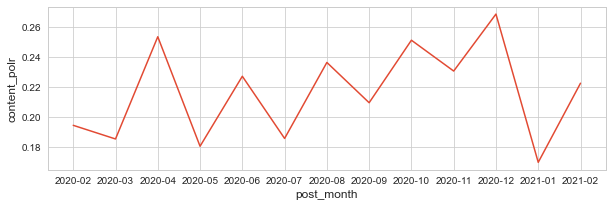

In [217]:
# step 4
for i, c in enumerate(df_or_timeline_sl_gr.columns):
    plt.figure(i)
    plt.figure(figsize = (10, 3))
    sns.lineplot(data = df_or_timeline_sl_gr, 
                    x = df_or_timeline_sl_gr['post_month'], 
                    y = df_or_timeline_sl_gr[c],
                    alpha = 1)

### 10.3. Trend Comparison for the Most Successful Companies and the Rest

Seeing the top 10 companies and all companies are usefu, espacially for the features frequency and the outbound link inclusion. However, to be able to compare these two segments in the same scale, let's plot the trends of these two key metrics for the two segments to understand their behaviour better.

#### Label top 10 companies in the main data frame

In [218]:
# add a new top10 column based on company
df_or['Top 10 Status'] = np.where(df_or['company'].isin(top10), 'Top 10', 'Remaining')

In [219]:
# step 1
df_or_timeline = df_or.sort_values('post_date', ascending = True)
df_or_timeline.reset_index(drop = True, inplace = True)

In [220]:
# step 2
df_or_timeline_sl = df_or_timeline[['frequency', 'outbound_link', 'post_month', 'Top 10 Status']]

In [221]:
# step 3
df_or_timeline_sl_gr = df_or_timeline_sl.groupby(['post_month', 'Top 10 Status']).agg({'frequency':['mean'], 
                                                                                       'outbound_link':['mean']})

df_or_timeline_sl_gr.columns = df_or_timeline_sl_gr.columns.droplevel(1)
df_or_timeline_sl_gr.reset_index(level = [0,1], inplace = True)

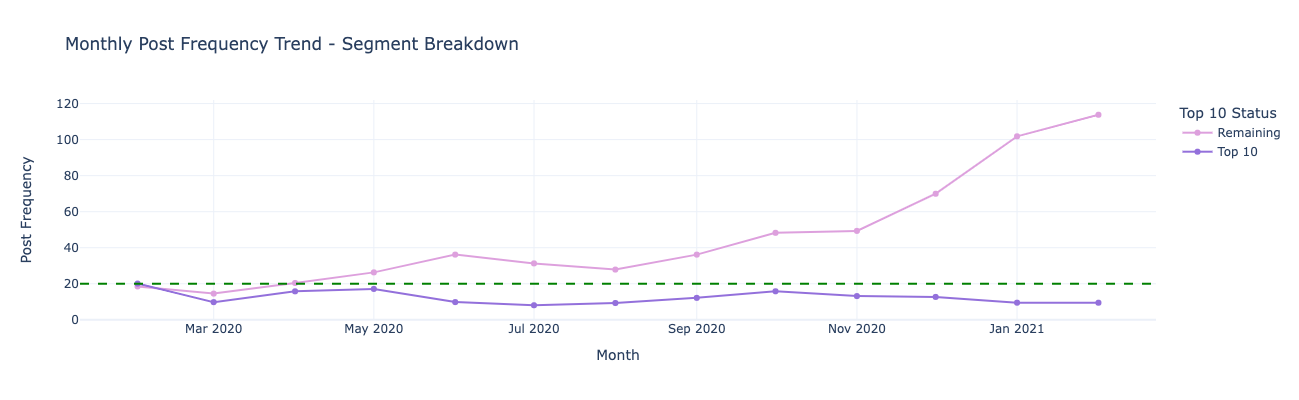

In [222]:
fig = px.line(df_or_timeline_sl_gr, 
              x = "post_month", 
              y = "frequency", 
              color = "Top 10 Status",
              color_discrete_map = {"Top 10": "MediumPurple", "Remaining": "Plum"},
              height = 400,
              width = 1000,
              title = "Monthly Post Frequency Trend - Segment Breakdown",
              labels = {"frequency":"Post Frequency", "post_month":"Month"},
              template = 'plotly_white'
             )
fig.update_traces(mode = "markers+lines", hovertemplate = None)
fig.update_layout(hovermode = "x unified")
fig.add_hline(y = 20, line_width = 2, line_dash = "dash", line_color = "green")

fig.show()

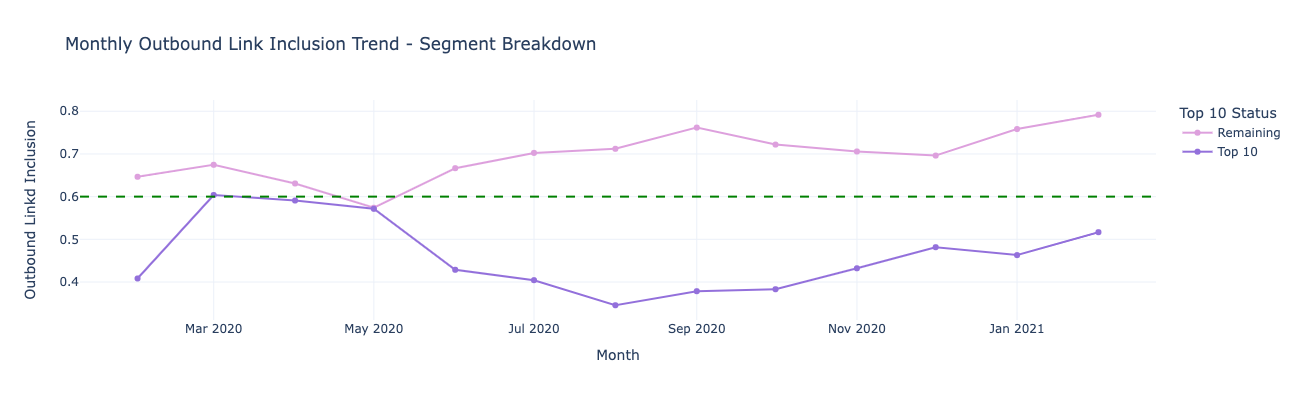

In [223]:
fig = px.line(df_or_timeline_sl_gr, 
              x = "post_month", 
              y = "outbound_link", 
              color = "Top 10 Status",
              color_discrete_map = {"Top 10": "MediumPurple", "Remaining": "Plum"},
              height = 400,
              width = 1000,
              title = "Monthly Outbound Link Inclusion Trend - Segment Breakdown",
              labels = {"outbound_link":"Outbound Linkd Inclusion", "post_month":"Month"},
              template = 'plotly_white'
             )
fig.update_traces(mode = "markers+lines", hovertemplate = None)
fig.update_layout(hovermode = "x unified")
fig.add_hline(y = 0.6, line_width = 2, line_dash = "dash", line_color = "green")

fig.show()